# SC1015 Project                                                           

## Group members: Bryan, Seann, Wei Jie

### Objective: Find the correlation between risk of heart failure and various factors

In [169]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [170]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [171]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (918, 12)


In [172]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [173]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


HeartFailure : 2
HeartDisease
1    508
0    410
Name: count, dtype: int64


/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


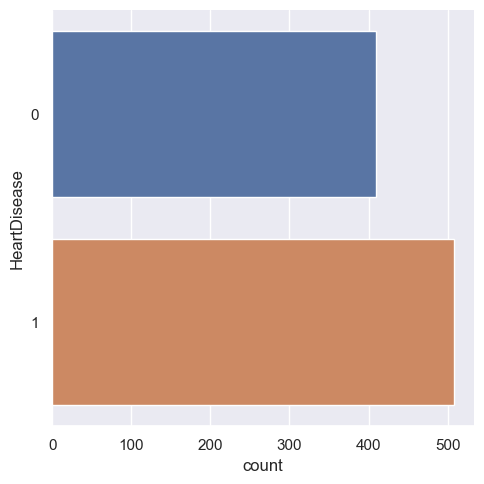

In [174]:
print("HeartFailure :", len(df["HeartDisease"].unique()))
# Get count of people with heart failure ()
print(df["HeartDisease"].value_counts())
sb.catplot(y = "HeartDisease", data = df, kind = "count")

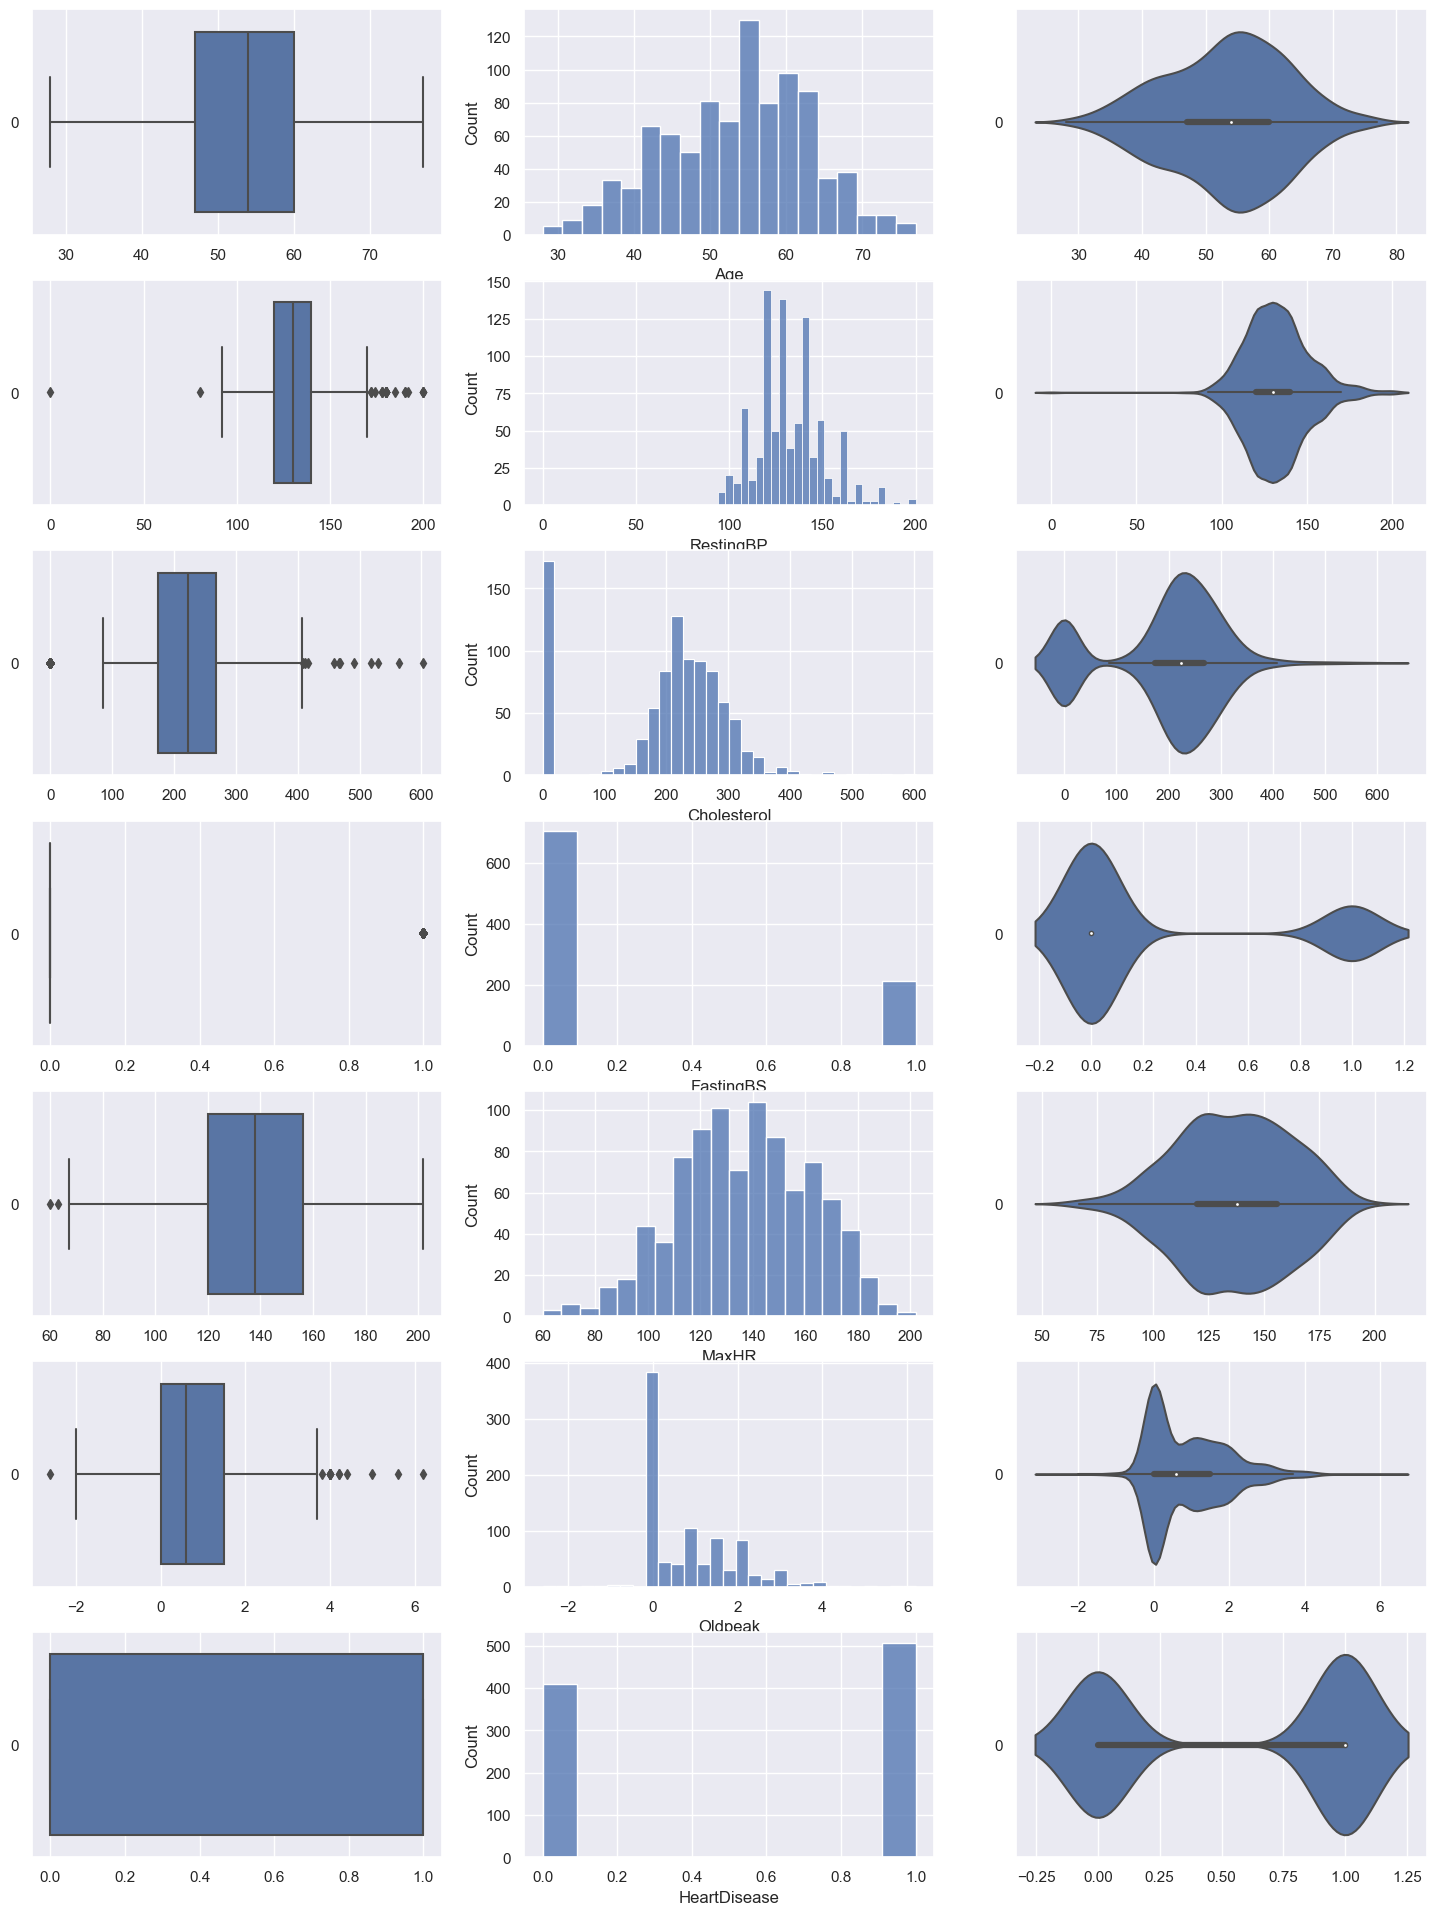

In [175]:
f, axes = plt.subplots(7, 3, figsize=(18, 24))

count = 0
for var in df:
    #Plot for numeric data only
    if df[var].dtypes == np.float64 or df[var].dtypes == np.int64:
        sb.boxplot(data = df[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = df[var], ax = axes[count,1])
        sb.violinplot(data = df[var], orient = "h", ax = axes[count,2])
        count += 1

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


<Axes: >

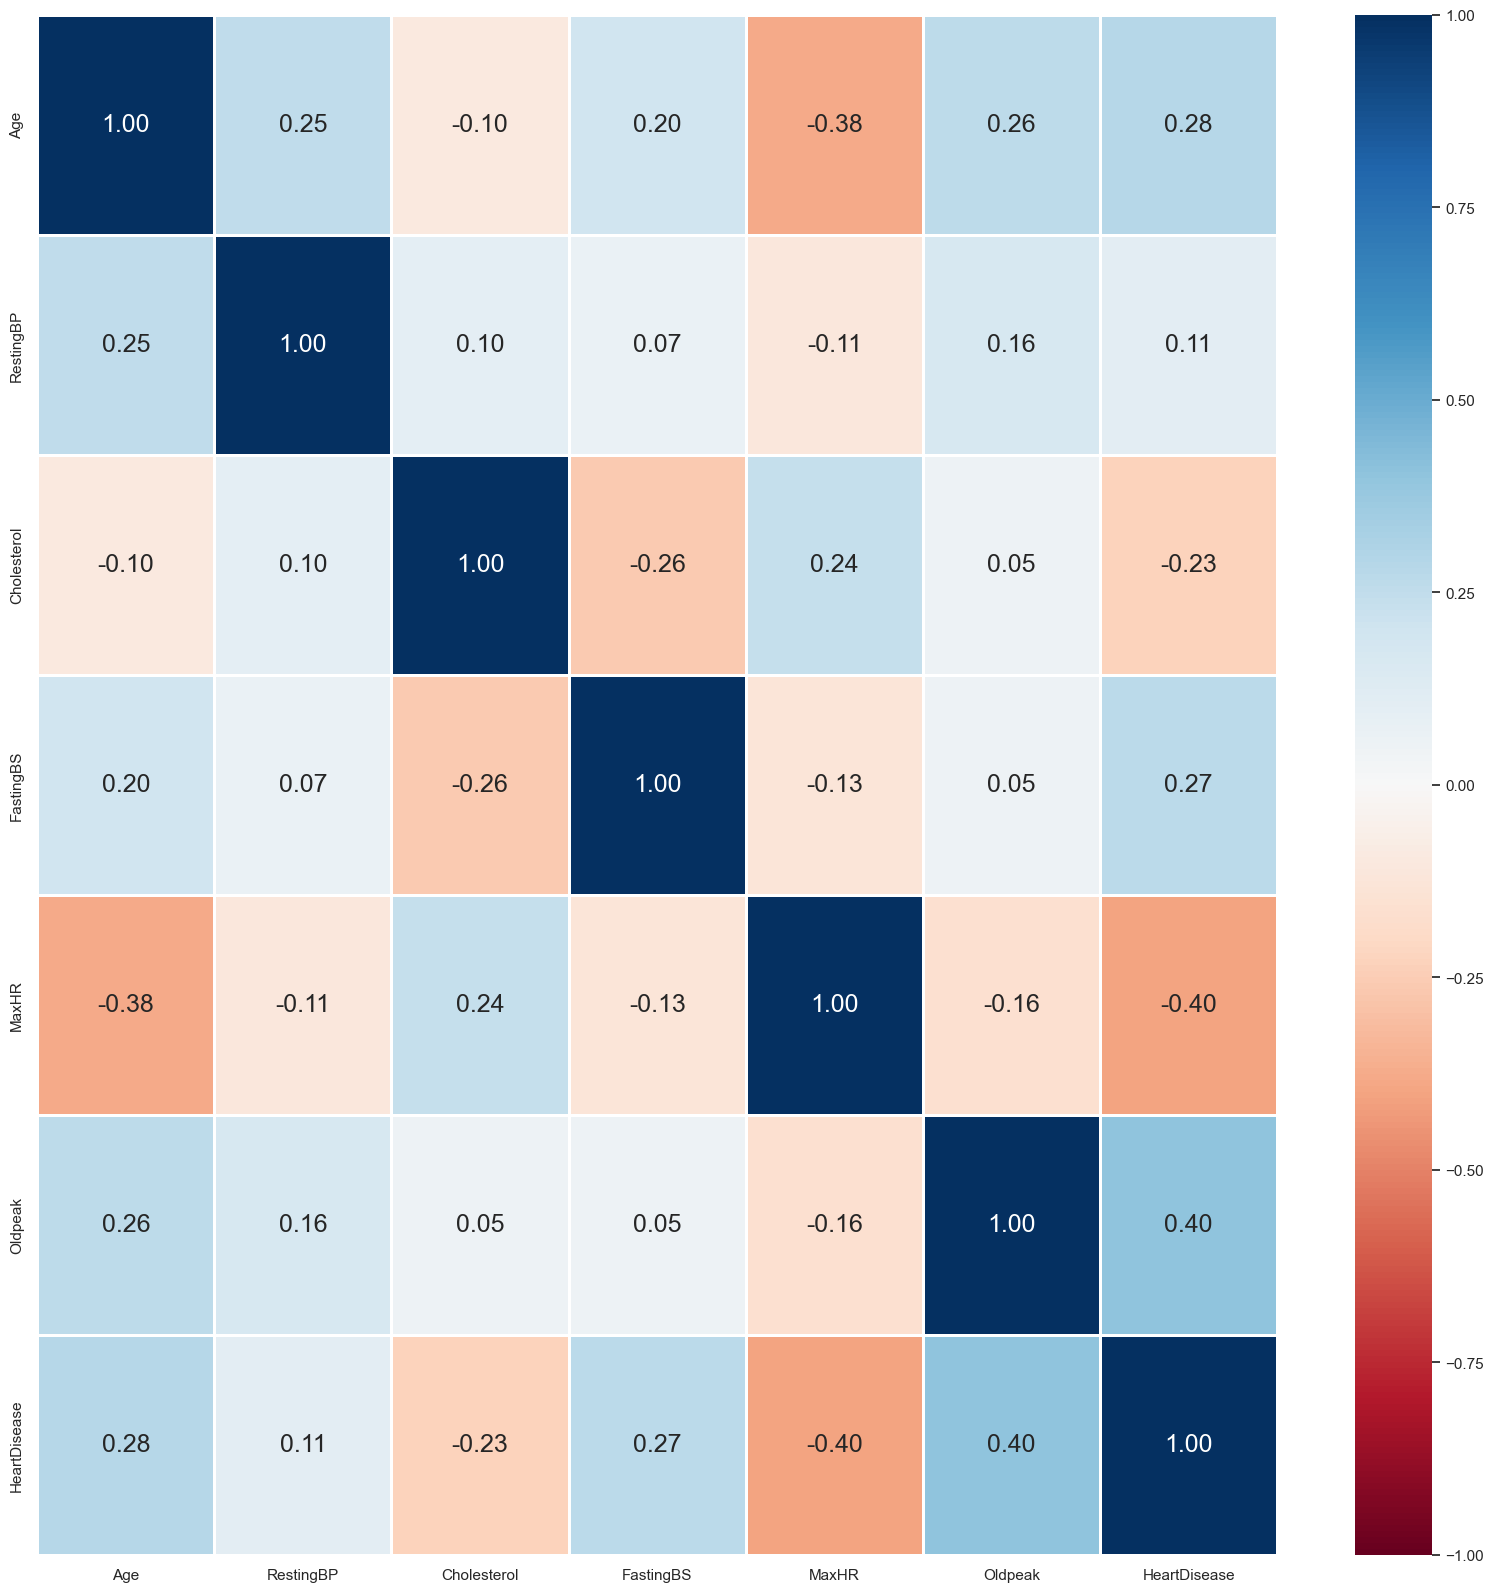

In [176]:
selected_columns = ['Age','RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
df_selected = df[selected_columns]

# Correlation Matrix
print(df_selected.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(df_selected.corr(), vmin=-1, vmax=1, linewidths=1,
            annot=True, fmt=".2f", annot_kws={"size": 18}, cmap="RdBu")

### Cleaning Data
We found that our dataset for cholestrol has 172 rows with value 0. So we decided to remove the outliers

In [177]:
print("There are " + str(df[(df['Cholesterol'] == 0)].shape[0]) + " rows with Cholestrol 0")

There are 172 rows with Cholestrol 0


/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Cholesterol', ylabel='HeartDisease'>

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


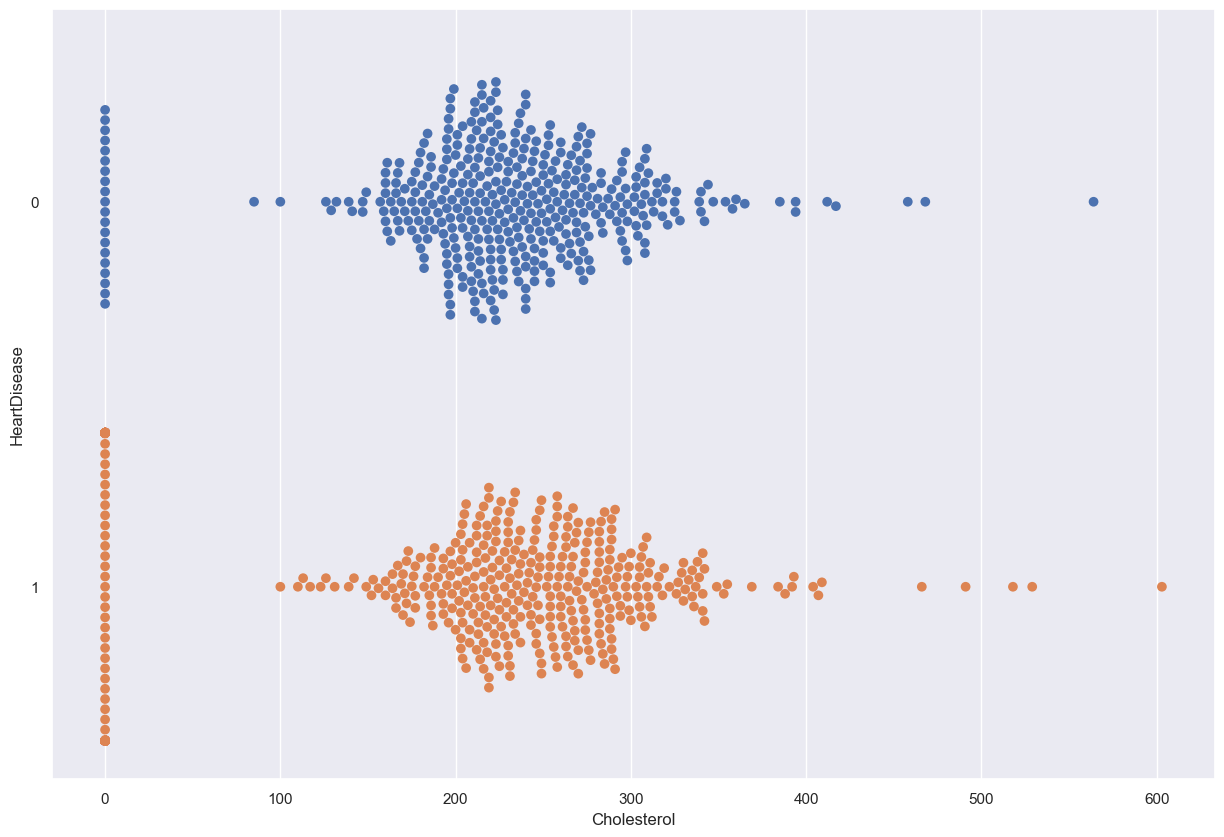

In [178]:
f = plt.figure(figsize=(15, 10))
sb.swarmplot(data=df, x="Cholesterol", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

## After removing

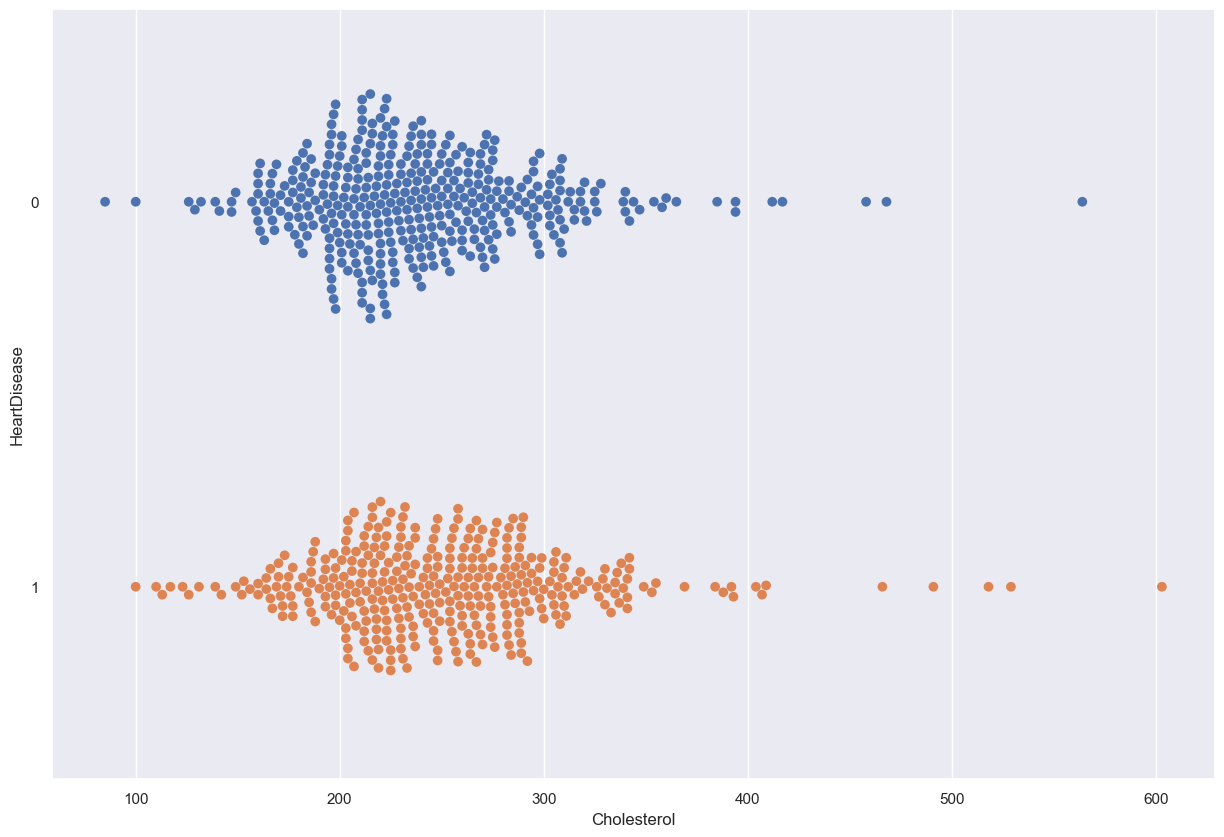

In [179]:
ch_filtered = df[df['Cholesterol'] != 0]

# Create the strip plot without outliers
f = plt.figure(figsize=(15, 10))
sb.swarmplot(data=ch_filtered, x="Cholesterol", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)
plt.show()

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.259865     0.058758   0.241338 -0.382112  0.286006   
RestingBP     0.259865   1.000000     0.095939   0.173765 -0.125774  0.198575   
Cholesterol   0.058758   0.095939     1.000000   0.054012 -0.019856  0.058488   
FastingBS     0.241338   0.173765     0.054012   1.000000 -0.102710  0.055568   
MaxHR        -0.382112  -0.125774    -0.019856  -0.102710  1.000000 -0.259533   
Oldpeak       0.286006   0.198575     0.058488   0.055568 -0.259533  1.000000   
HeartDisease  0.298617   0.173242     0.103866   0.160594 -0.377212  0.495696   

              HeartDisease  
Age               0.298617  
RestingBP         0.173242  
Cholesterol       0.103866  
FastingBS         0.160594  
MaxHR            -0.377212  
Oldpeak           0.495696  
HeartDisease      1.000000  


<Axes: >

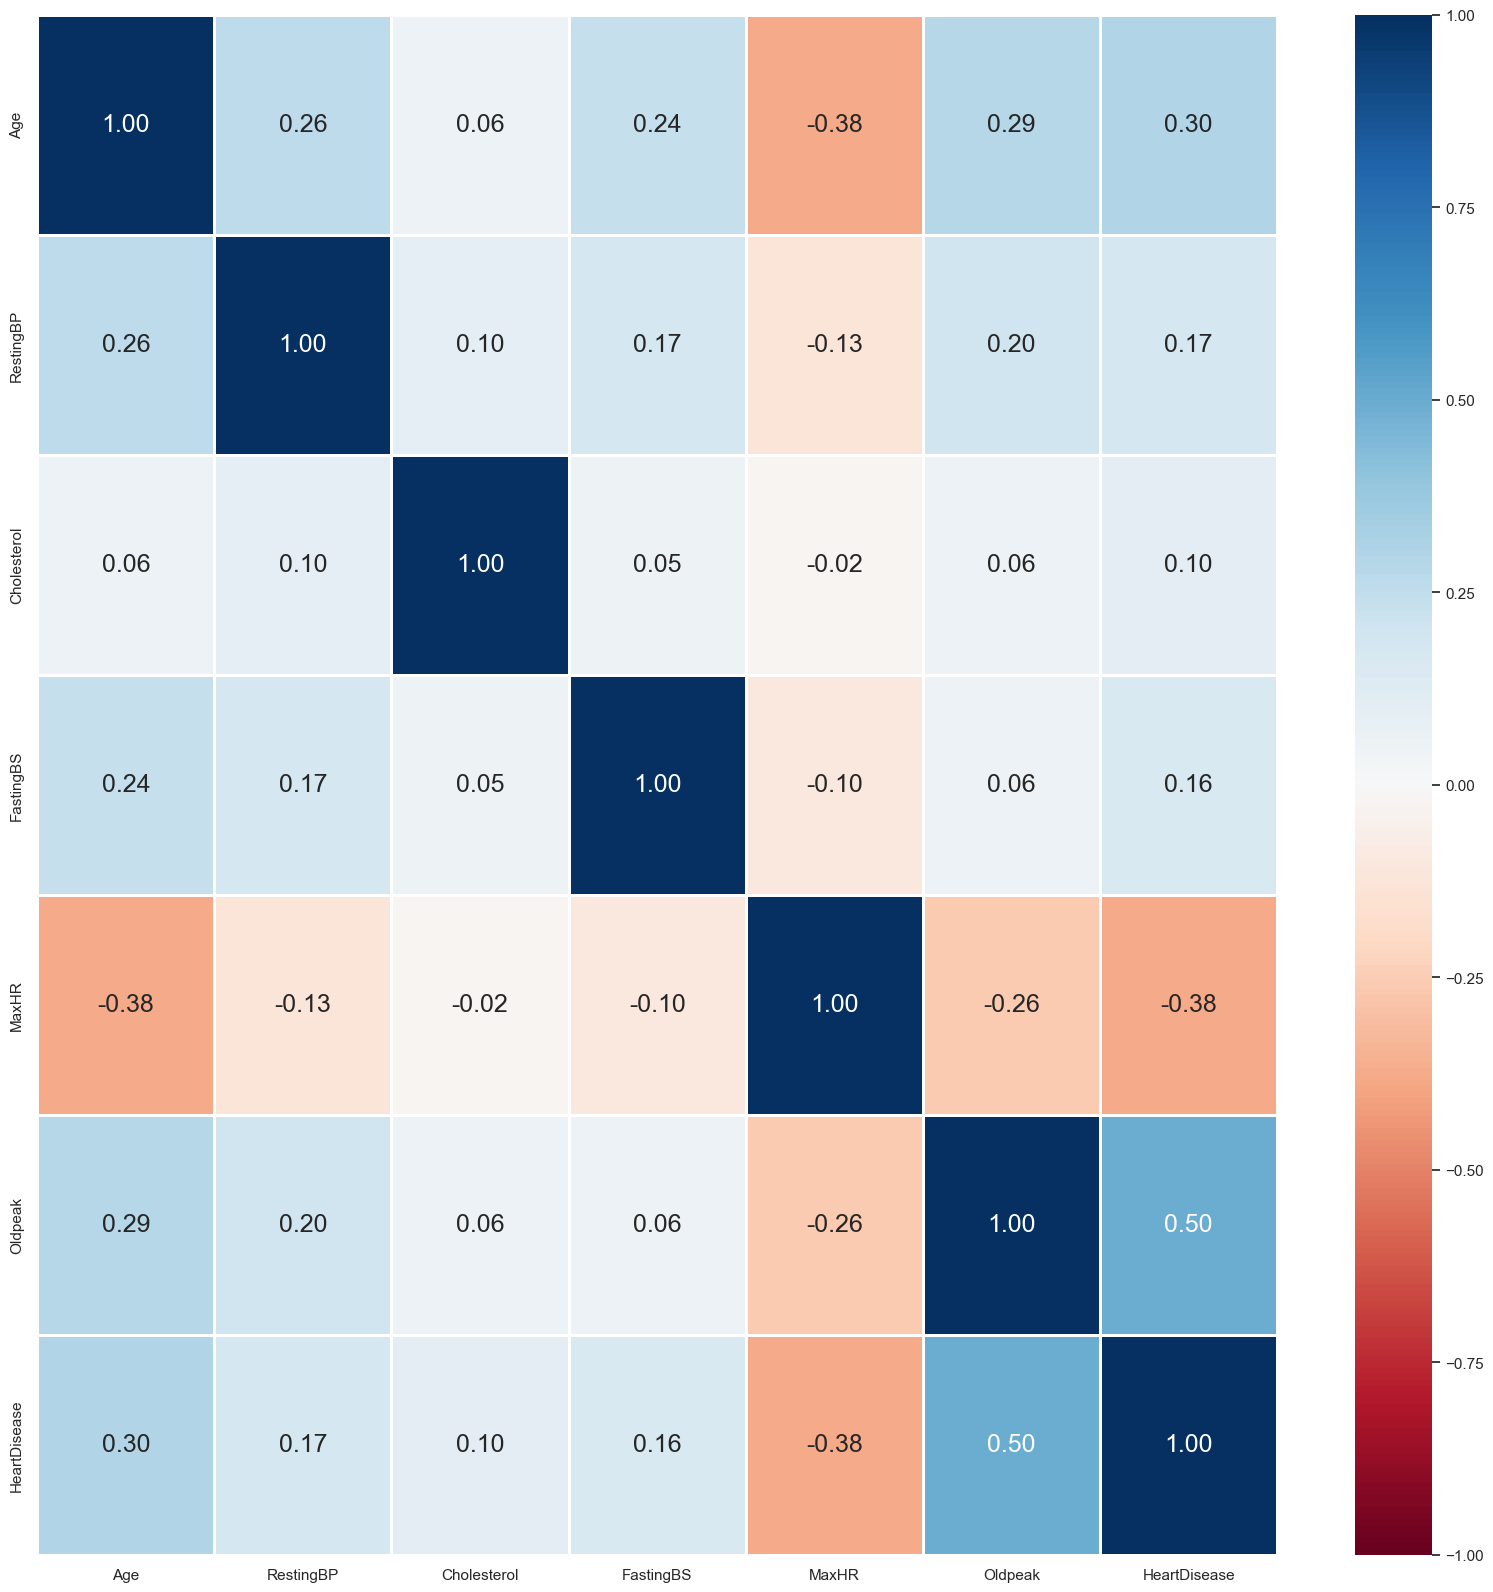

In [180]:
selected_columns = ['Age','RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
df_selected = ch_filtered[selected_columns]

# Correlation Matrix
print(df_selected.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(df_selected.corr(), vmin=-1, vmax=1, linewidths=1,
            annot=True, fmt=".2f", annot_kws={"size": 18}, cmap="RdBu")

The correlation after removing the outlier were better for Oldpeak, Age and RestingBP. But got a bit worse for MaxHR and FastingBS

HeartFailure : 2
HeartDisease
0    390
1    356
Name: count, dtype: int64


/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


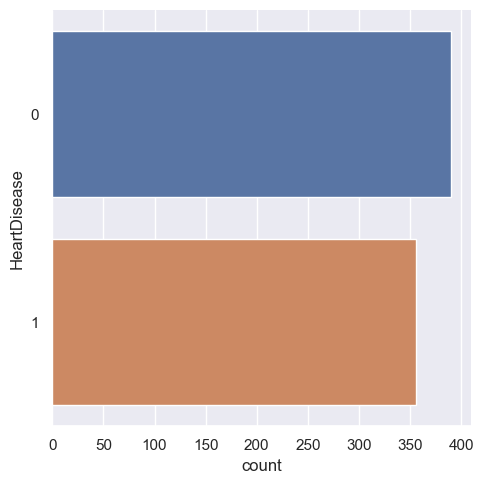

In [181]:
print("HeartFailure :", len(df["HeartDisease"].unique()))
# Get count of people with heart failure ()
print(ch_filtered["HeartDisease"].value_counts())
sb.catplot(y = "HeartDisease", data = ch_filtered, kind = "count")

# BAD FACTORS AFTER DATA CLEANING

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='FastingBS', ylabel='HeartDisease'>

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


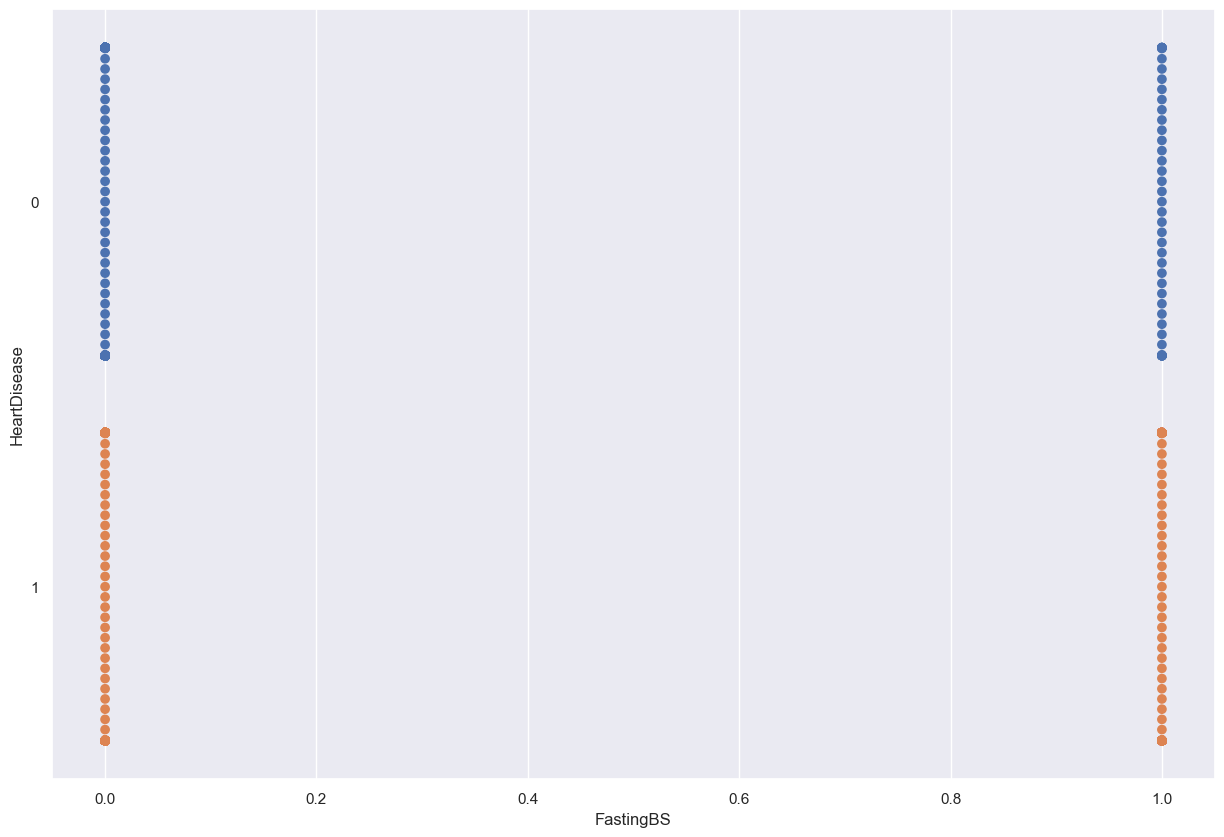

In [211]:
f = plt.figure(figsize=(15, 10)) #After
sb.swarmplot(data=df, x="FastingBS", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


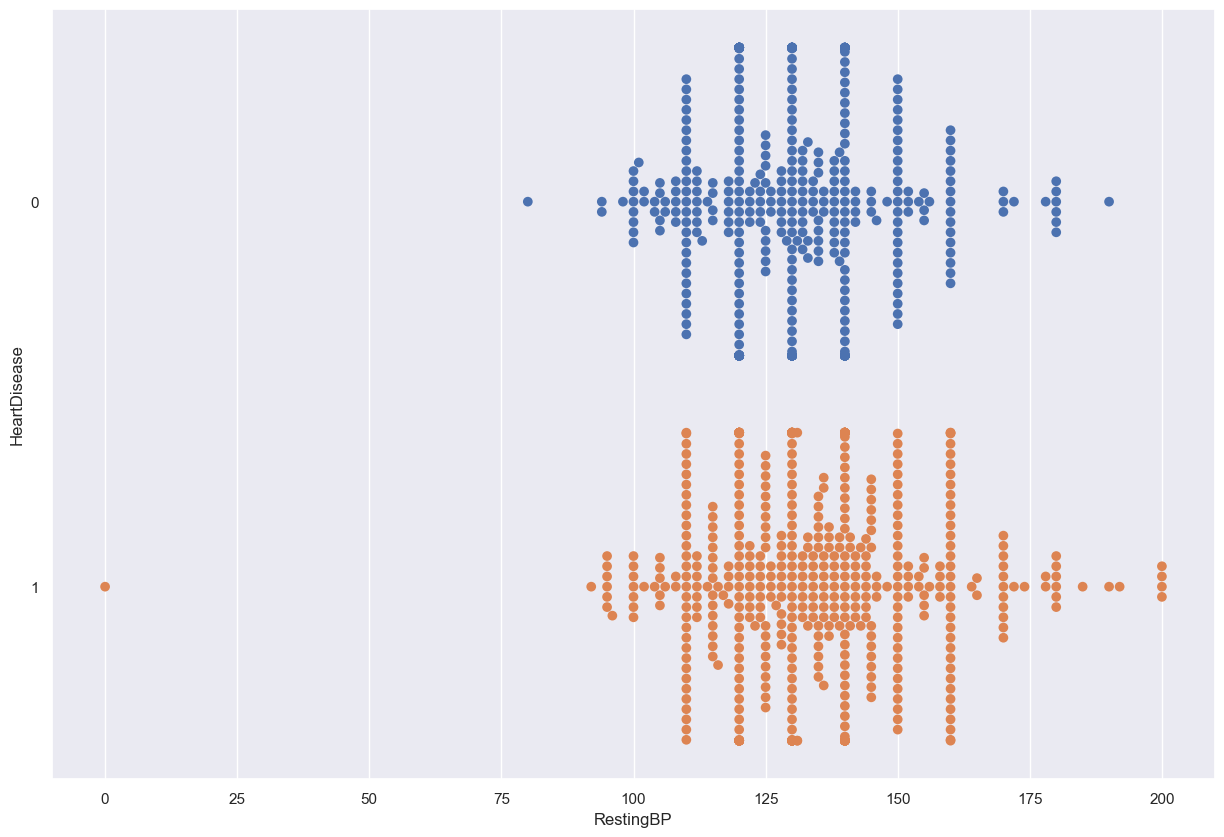

In [212]:
f = plt.figure(figsize=(15, 10)) #Before
sb.swarmplot(data=df, x="RestingBP", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

# GOOD FACTORS COMPARISON

<Axes: xlabel='Age', ylabel='HeartDisease'>

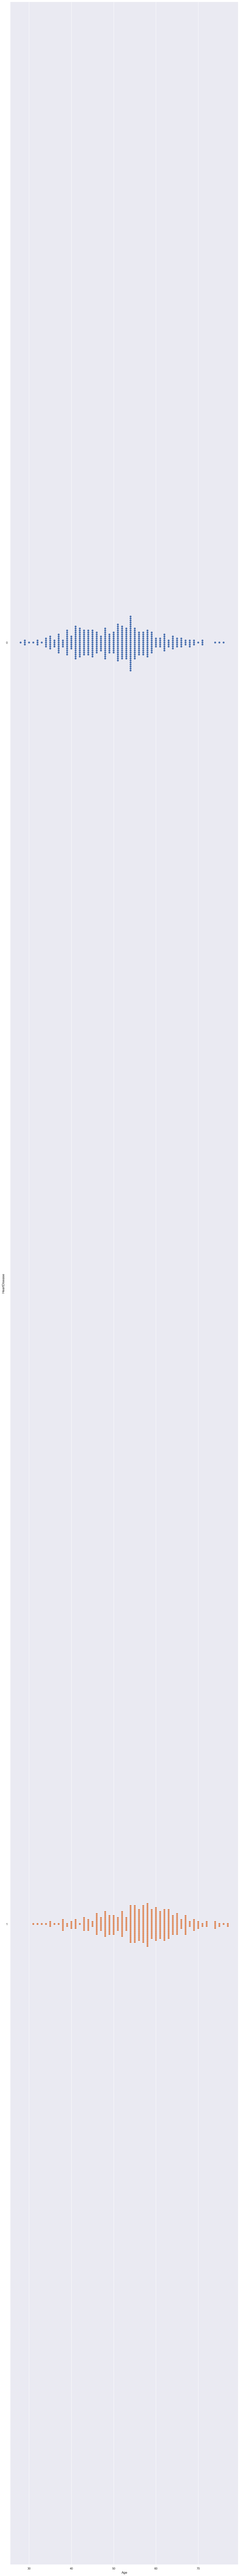

In [210]:
f = plt.figure(figsize=(15, 170)) #After
sb.swarmplot(data=ch_filtered, x="Age", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

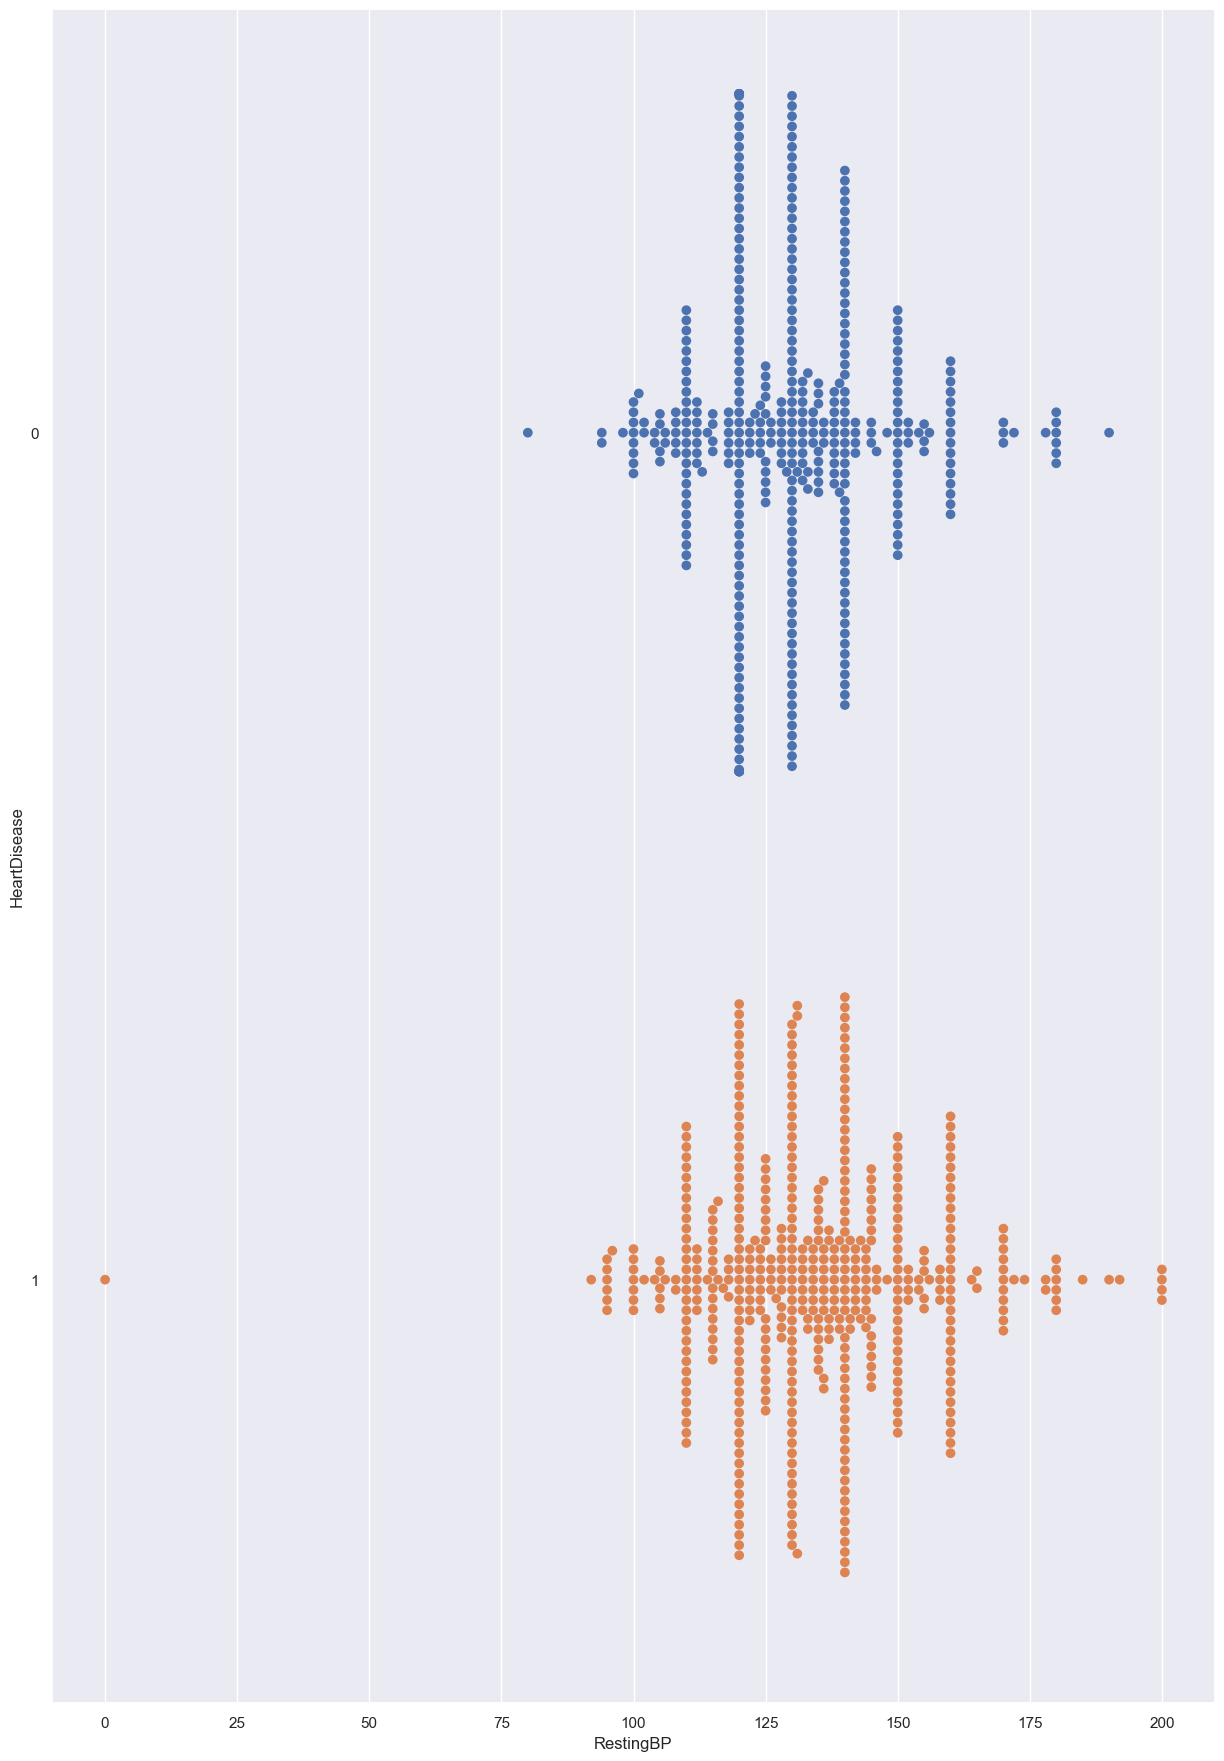

In [184]:
f = plt.figure(figsize=(15, 22)) #Before
sb.swarmplot(data=df, x="RestingBP", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

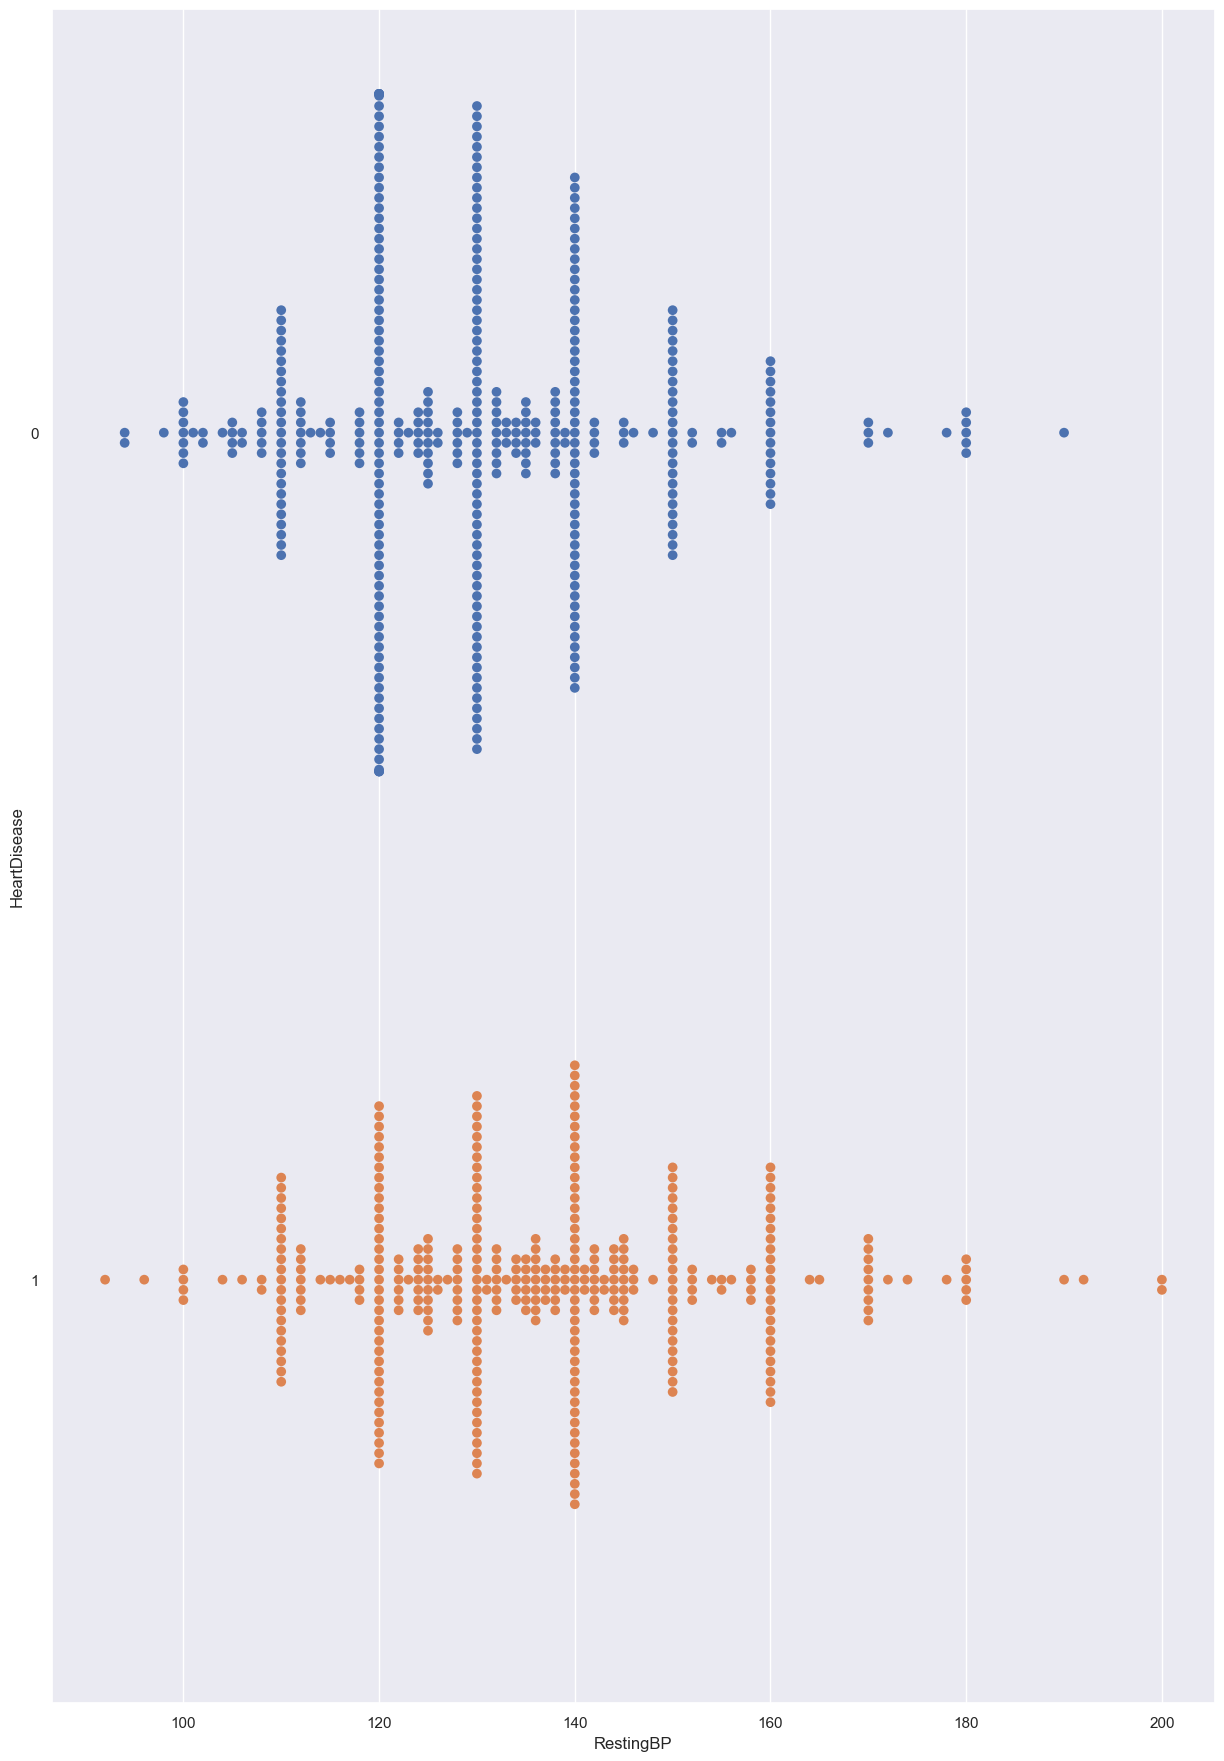

In [185]:
f = plt.figure(figsize=(15, 22)) #AFter
sb.swarmplot(data=ch_filtered, x="RestingBP", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

<Axes: xlabel='MaxHR', ylabel='HeartDisease'>

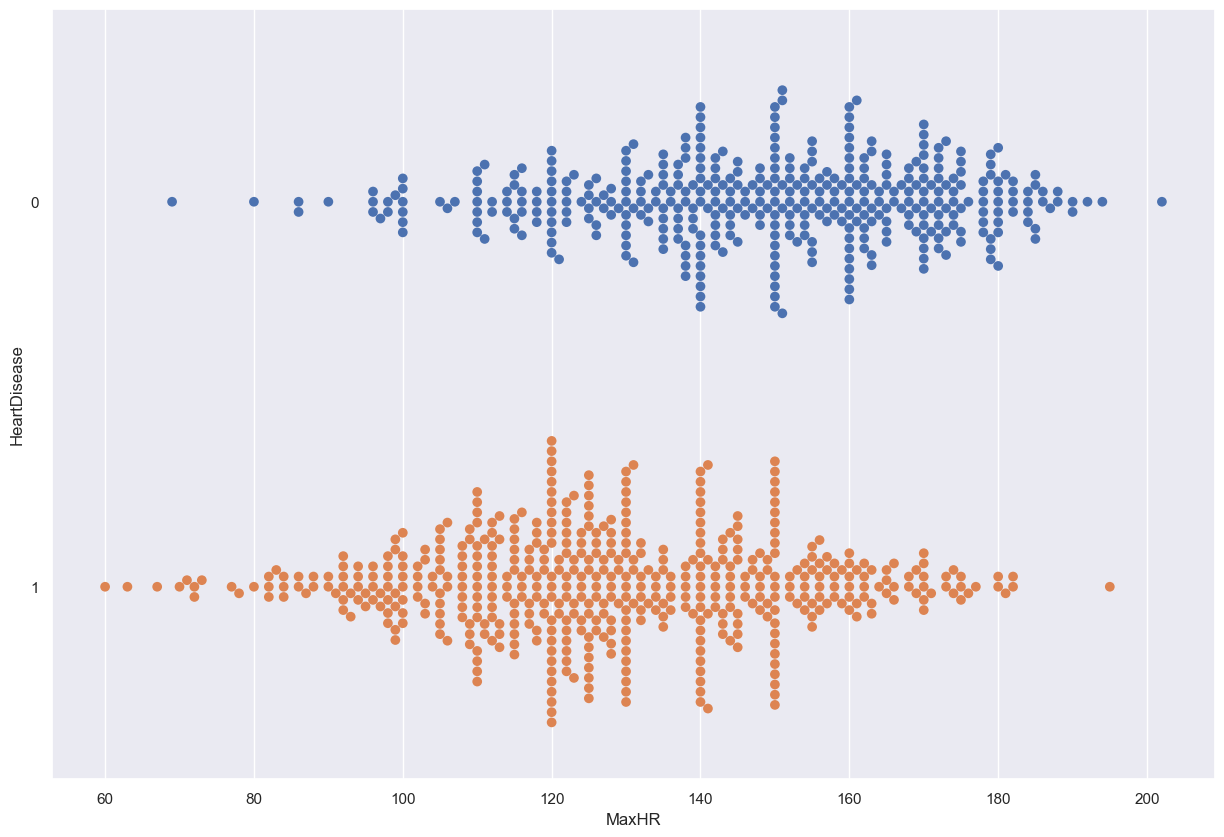

In [186]:
f = plt.figure(figsize=(15, 10)) #Before
sb.swarmplot(data=df, x="MaxHR", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

<Axes: xlabel='MaxHR', ylabel='HeartDisease'>

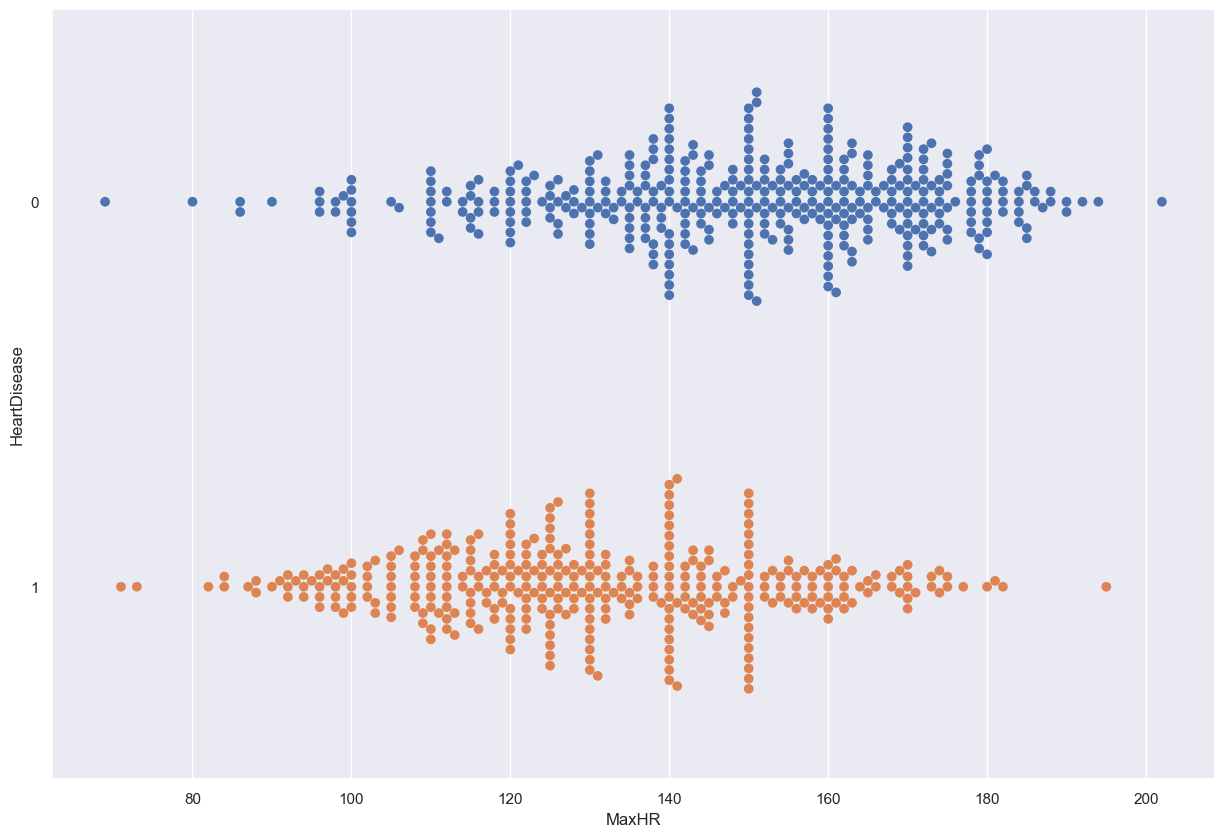

In [187]:
f = plt.figure(figsize=(15, 10)) #After
sb.swarmplot(data=ch_filtered, x="MaxHR", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


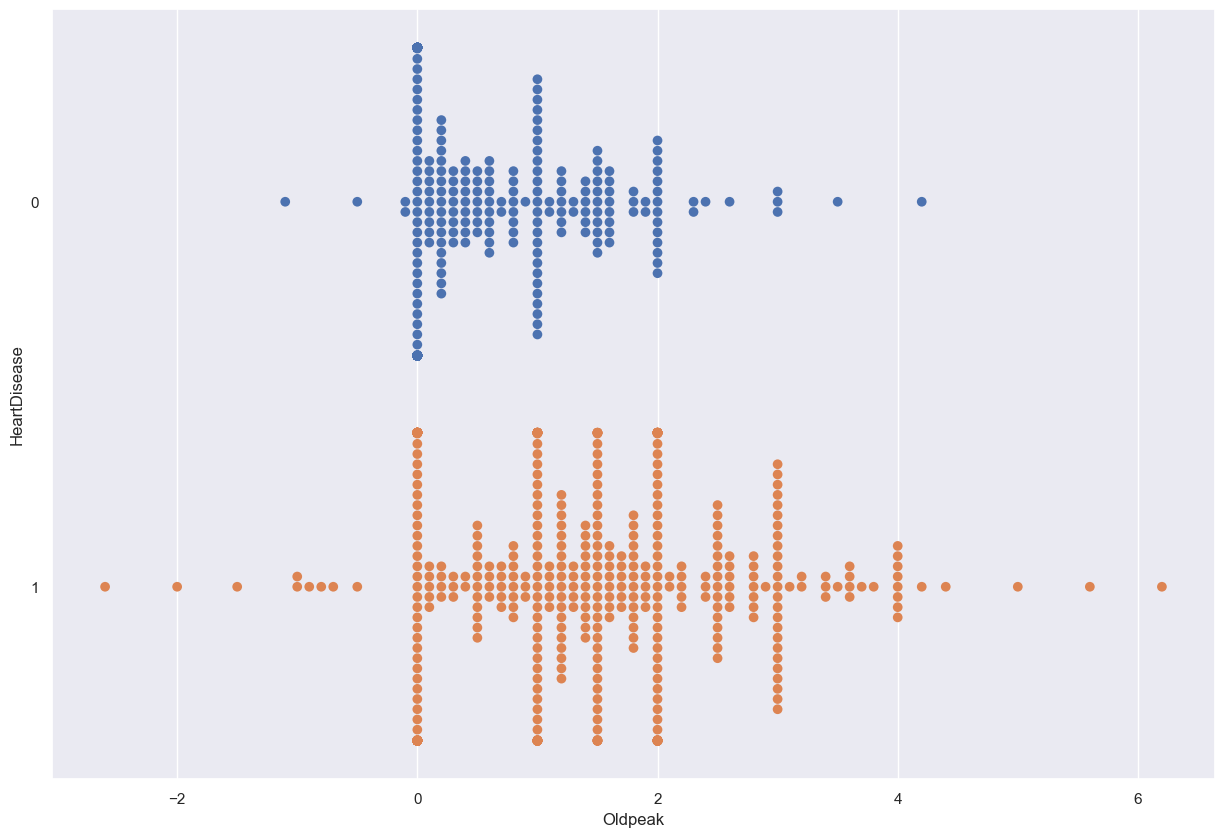

In [209]:
f = plt.figure(figsize=(15, 10)) #Before
sb.swarmplot(data=df, x="Oldpeak", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

/Users/seann/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


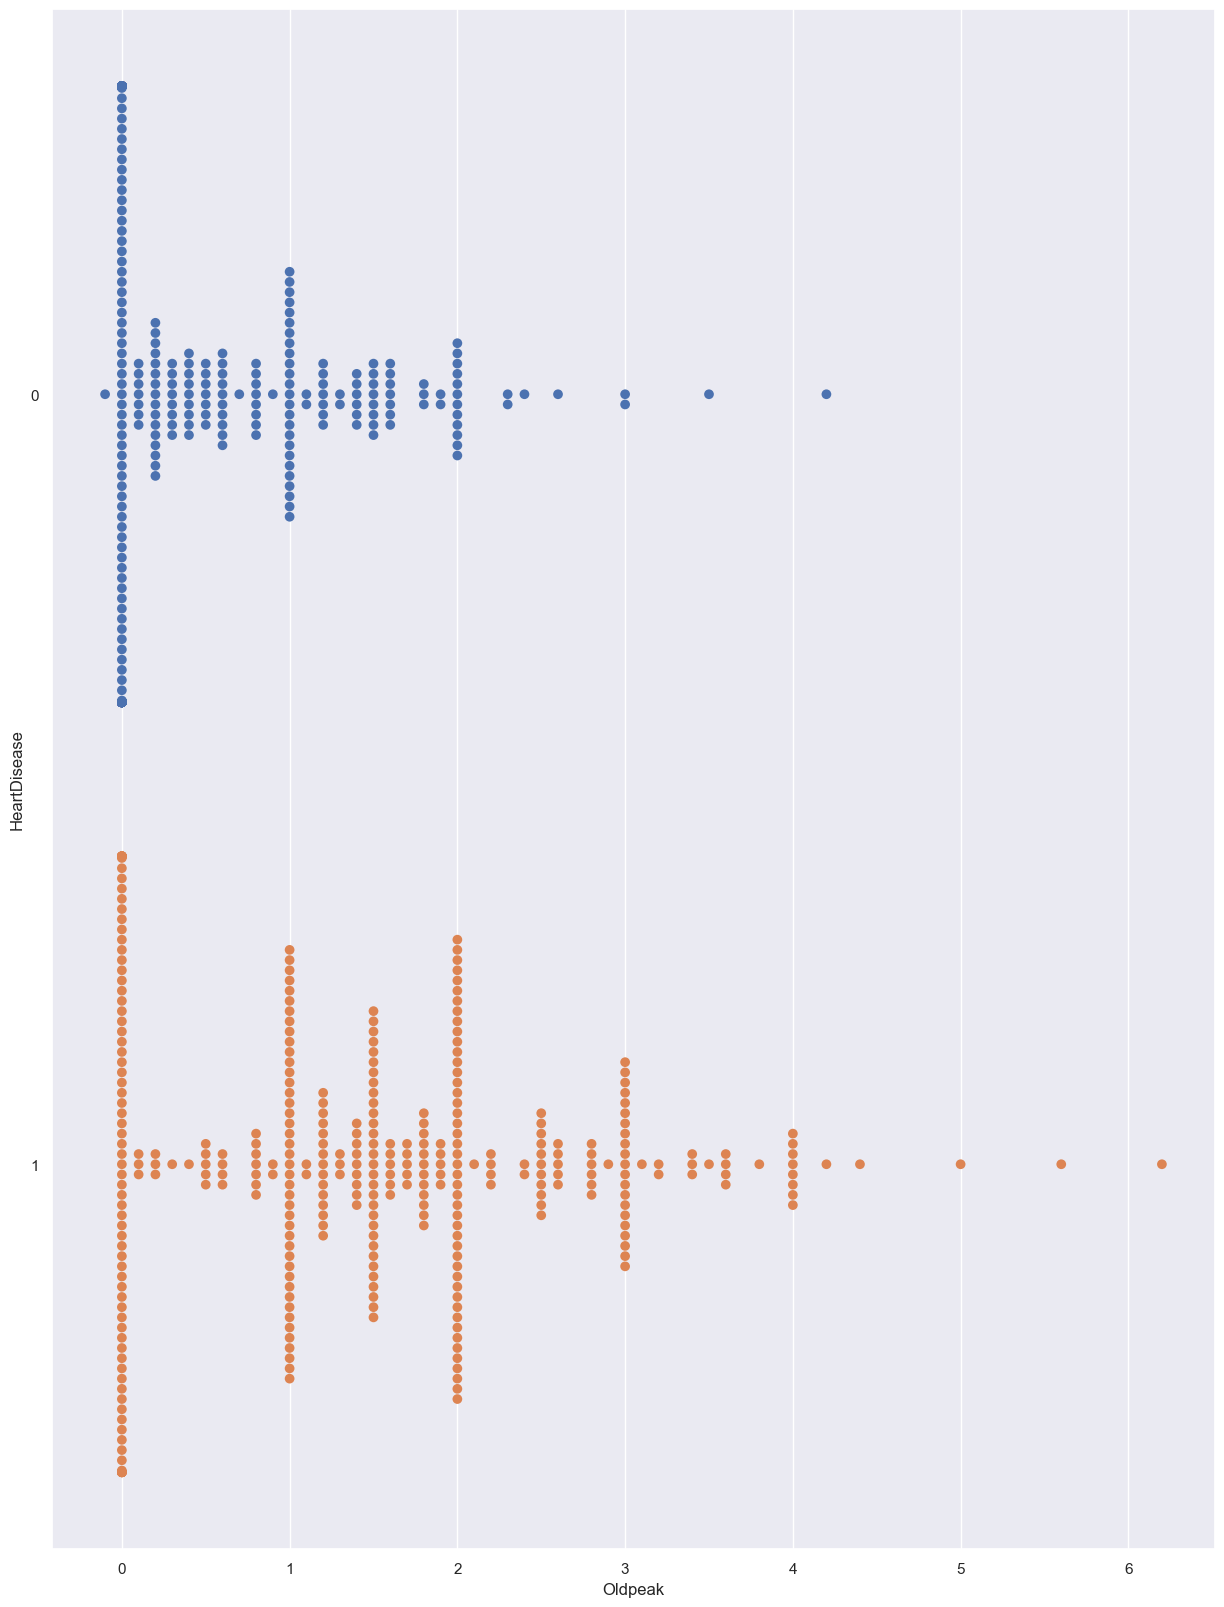

In [189]:
f = plt.figure(figsize=(15, 20)) #After
sb.swarmplot(data=ch_filtered, x="Oldpeak", y="HeartDisease", hue="HeartDisease", orient="h", size=7, legend=False)

### Ranking the usefulness of each variable
Good factors: Age, MaxHR, Oldpeak (Showed variation across different graphs for HeartDisease) 

Intercept of Regression 	: b =  [0.46710906]
Coefficients of Regression 	: a =  [[ 0.00278664  0.00046491  0.00069205  0.12600195 -0.00390643  0.18141836]]

    Predictors  Coefficients
0          Age      0.002787
1    RestingBP      0.000465
2  Cholesterol      0.000692
3    FastingBS      0.126002
4        MaxHR     -0.003906
5      Oldpeak      0.181418



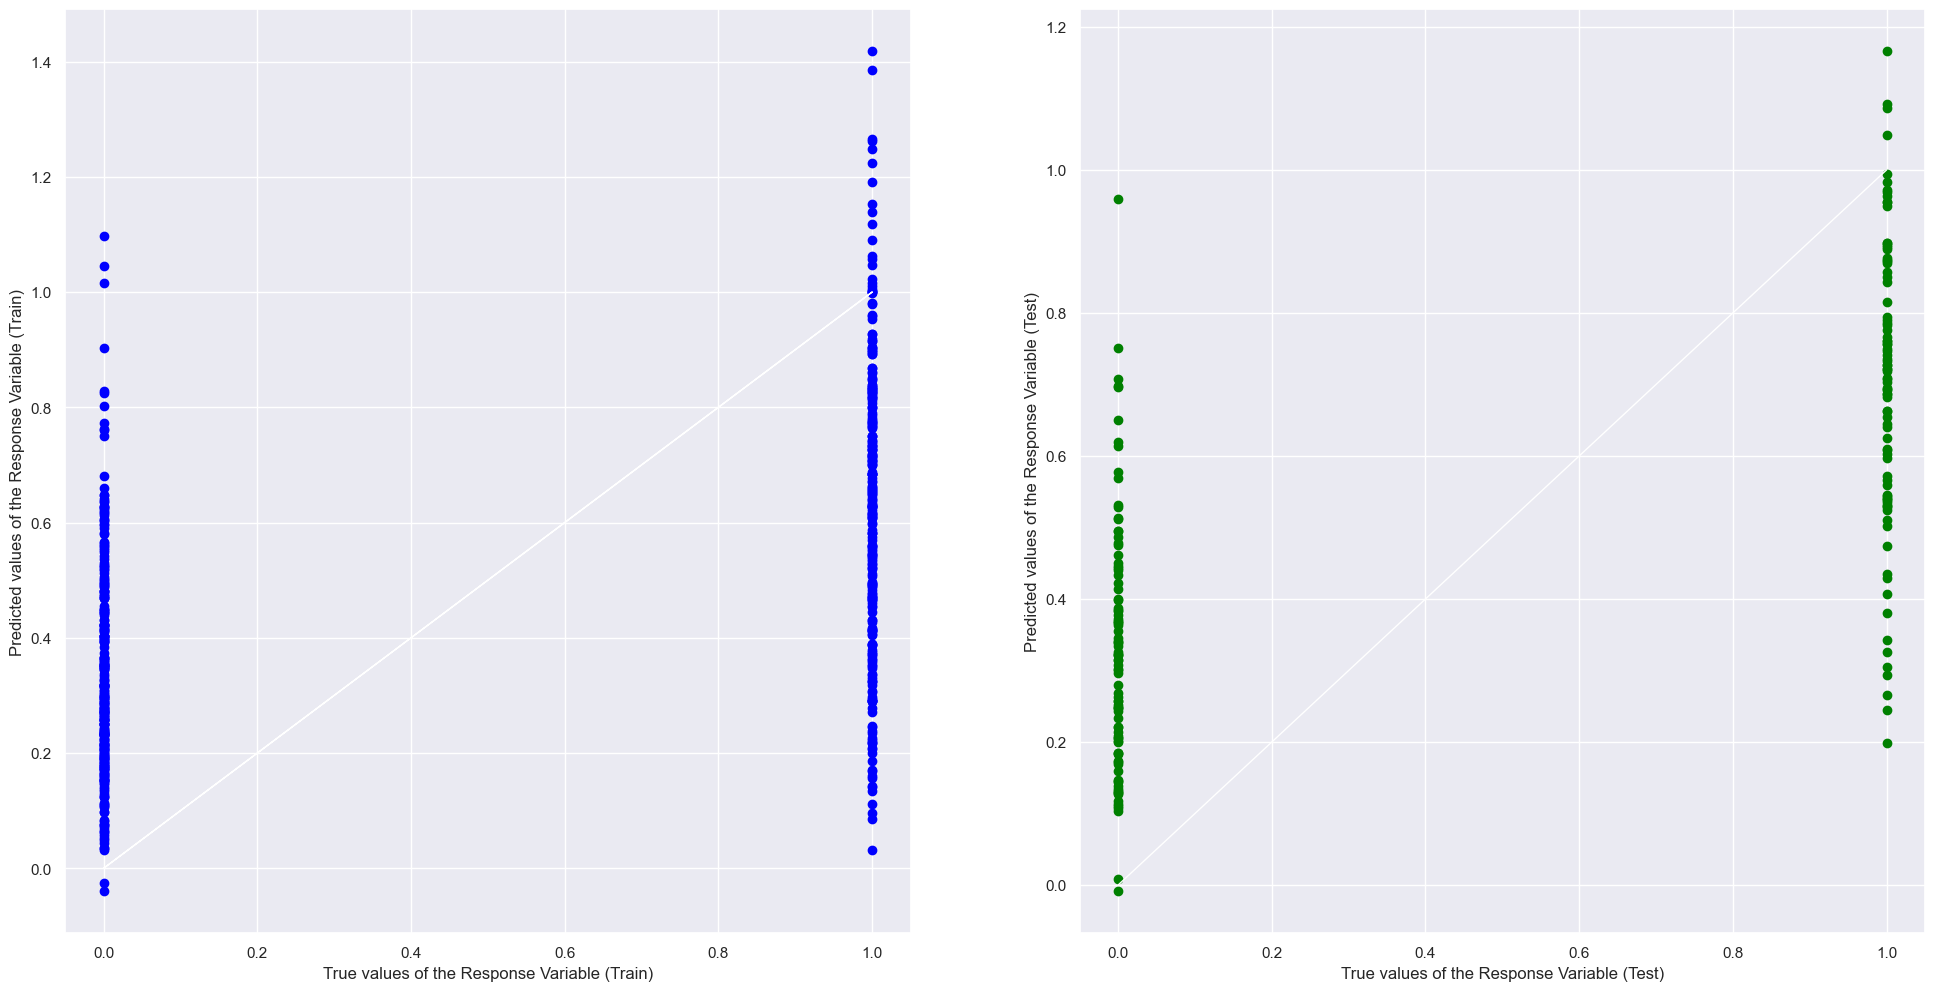

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.28800389362718526
Mean Squared Error (MSE) 	: 0.17751996648598153

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4522876400065551
Mean Squared Error (MSE) 	: 0.13683019751502



In [190]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(ch_filtered["HeartDisease"])
X = pd.DataFrame(ch_filtered[['Age','RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [0.87564077]
Coefficients of Regression 	: a =  [[ 0.00375538 -0.00562287  0.19436516]]

  Predictors  Coefficients
0        Age      0.003755
1      MaxHR     -0.005623
2    Oldpeak      0.194365



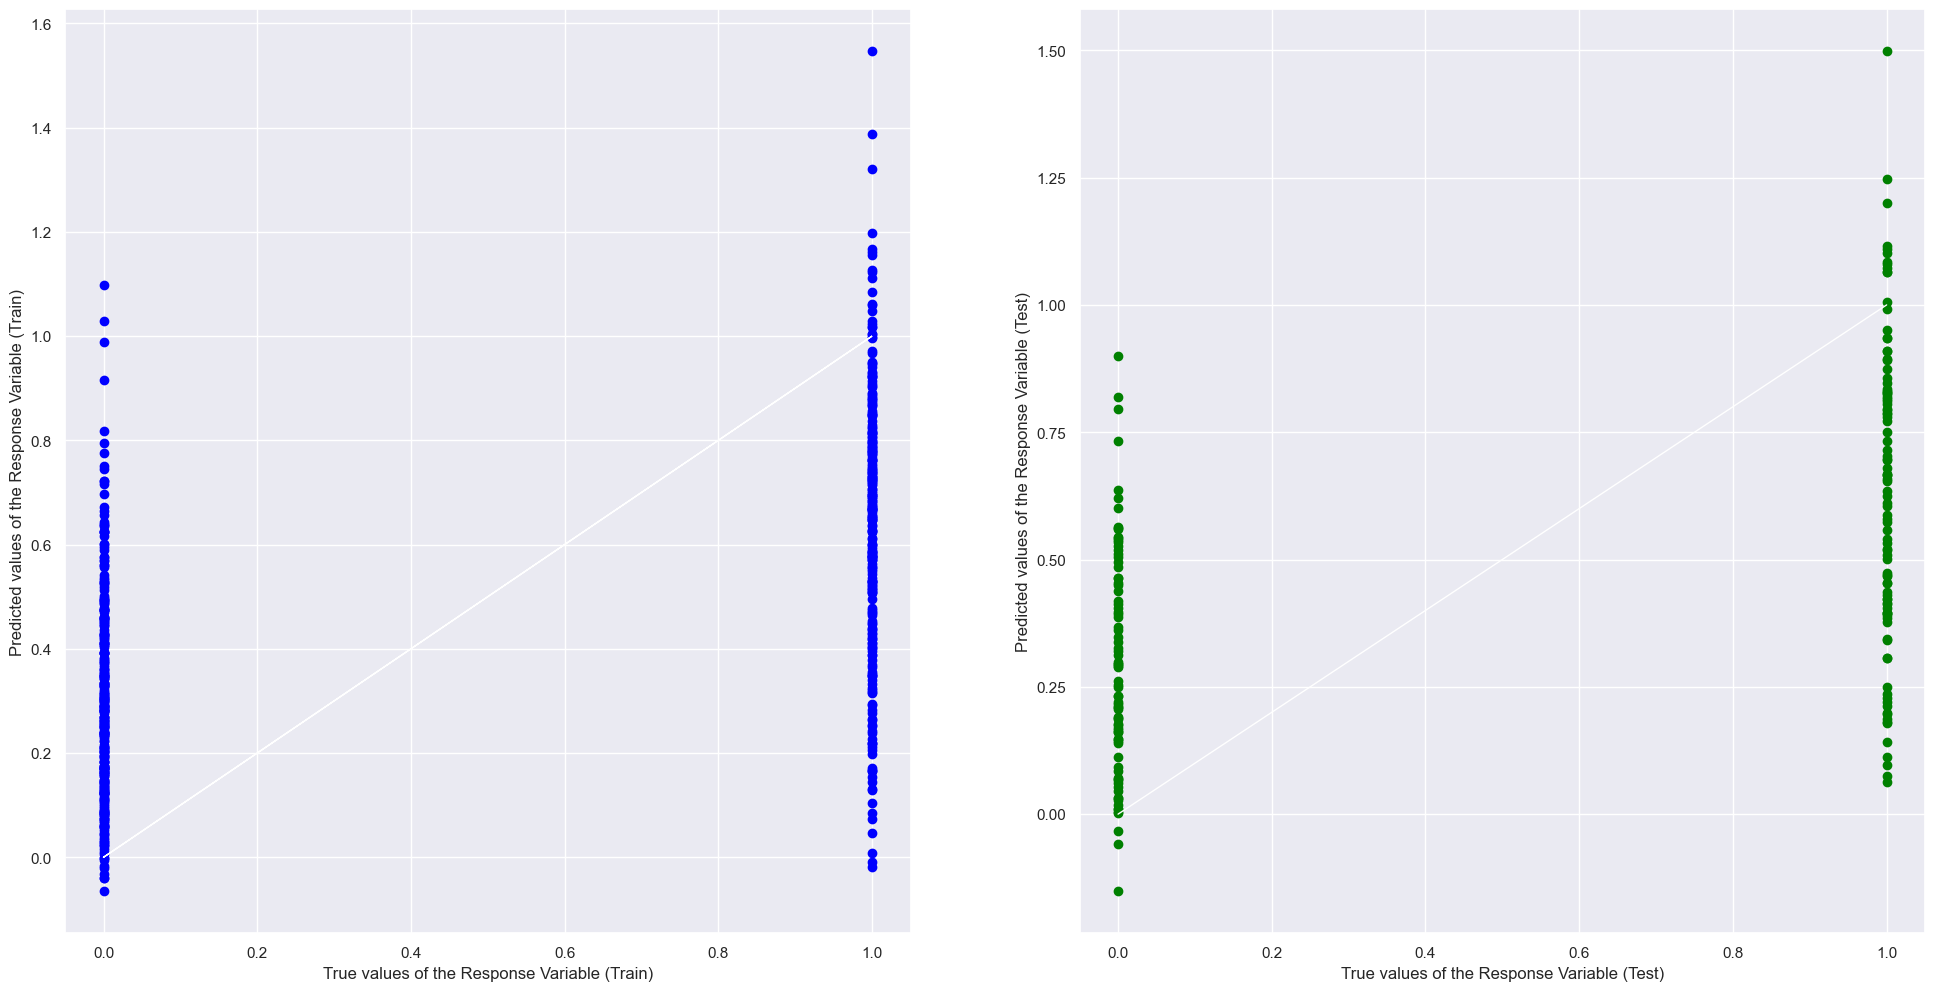

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3333265038494333
Mean Squared Error (MSE) 	: 0.16538774972427744

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.25064745482474216
Mean Squared Error (MSE) 	: 0.18613275207733387



In [191]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(ch_filtered["HeartDisease"])
X = pd.DataFrame(ch_filtered[['Age', 'MaxHR', 'Oldpeak']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Multi-Class Decision Tree Classifier

In [192]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7969798657718121

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7333333333333333



<Axes: >

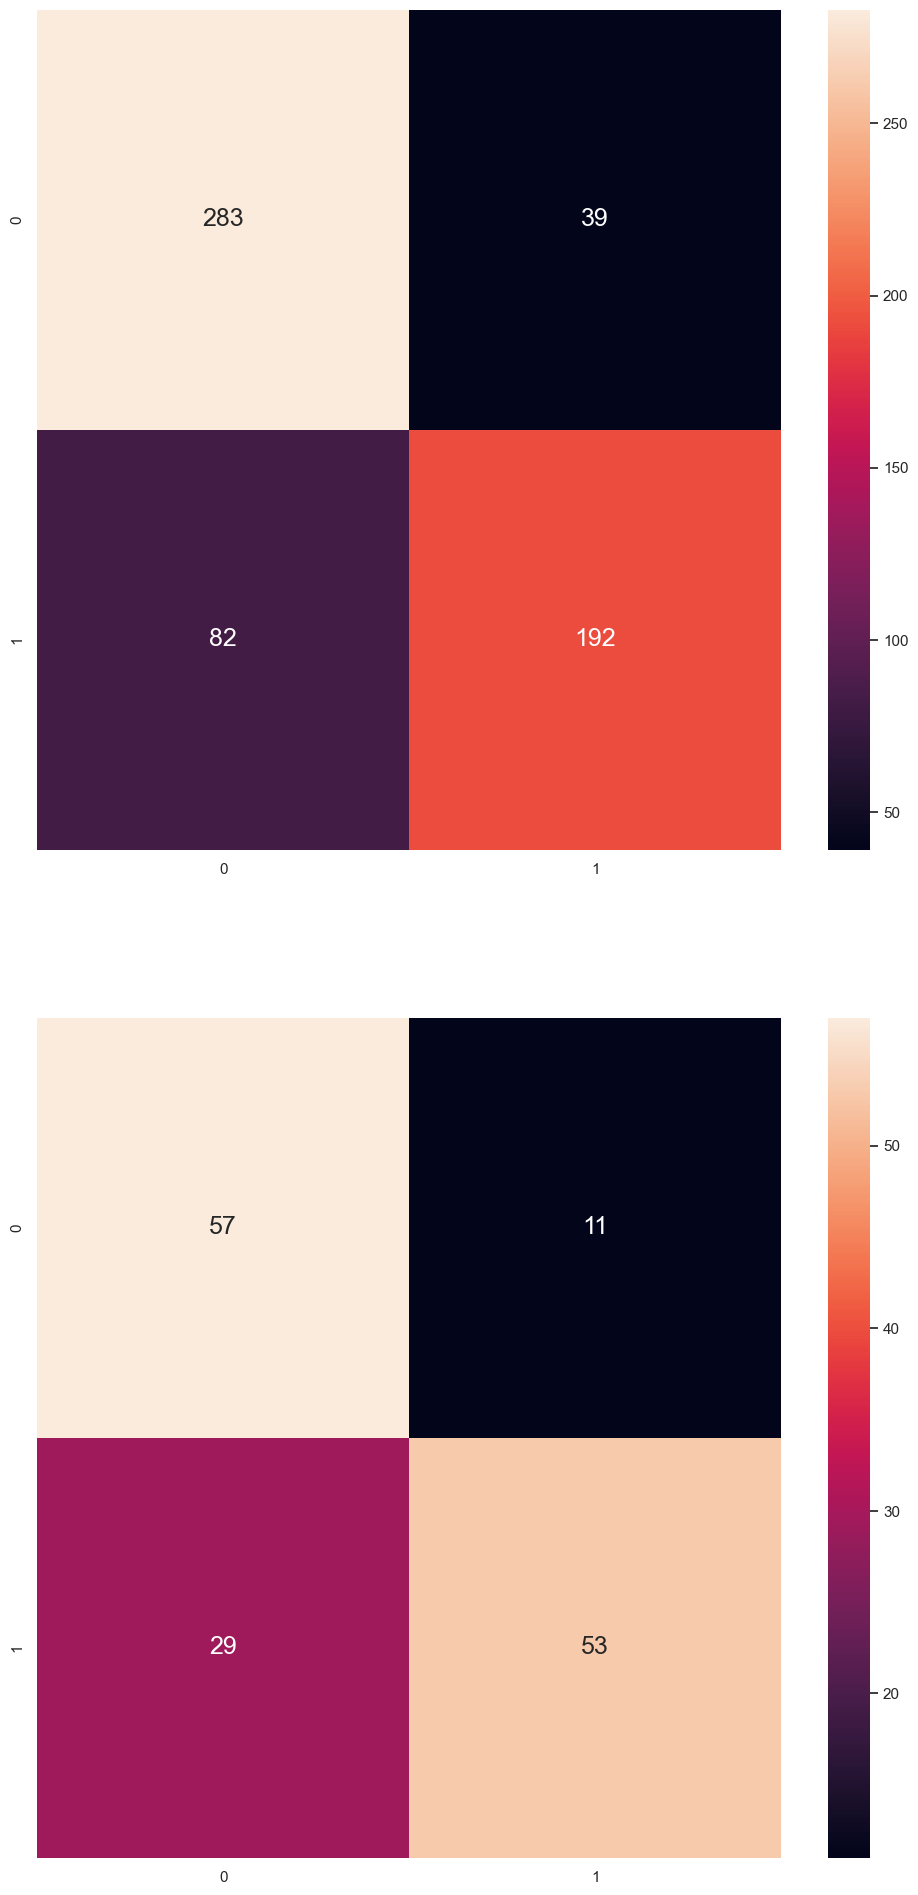

In [193]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Dummy Classifier for Benchmarking

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.540268456375839

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4533333333333333



<Axes: >

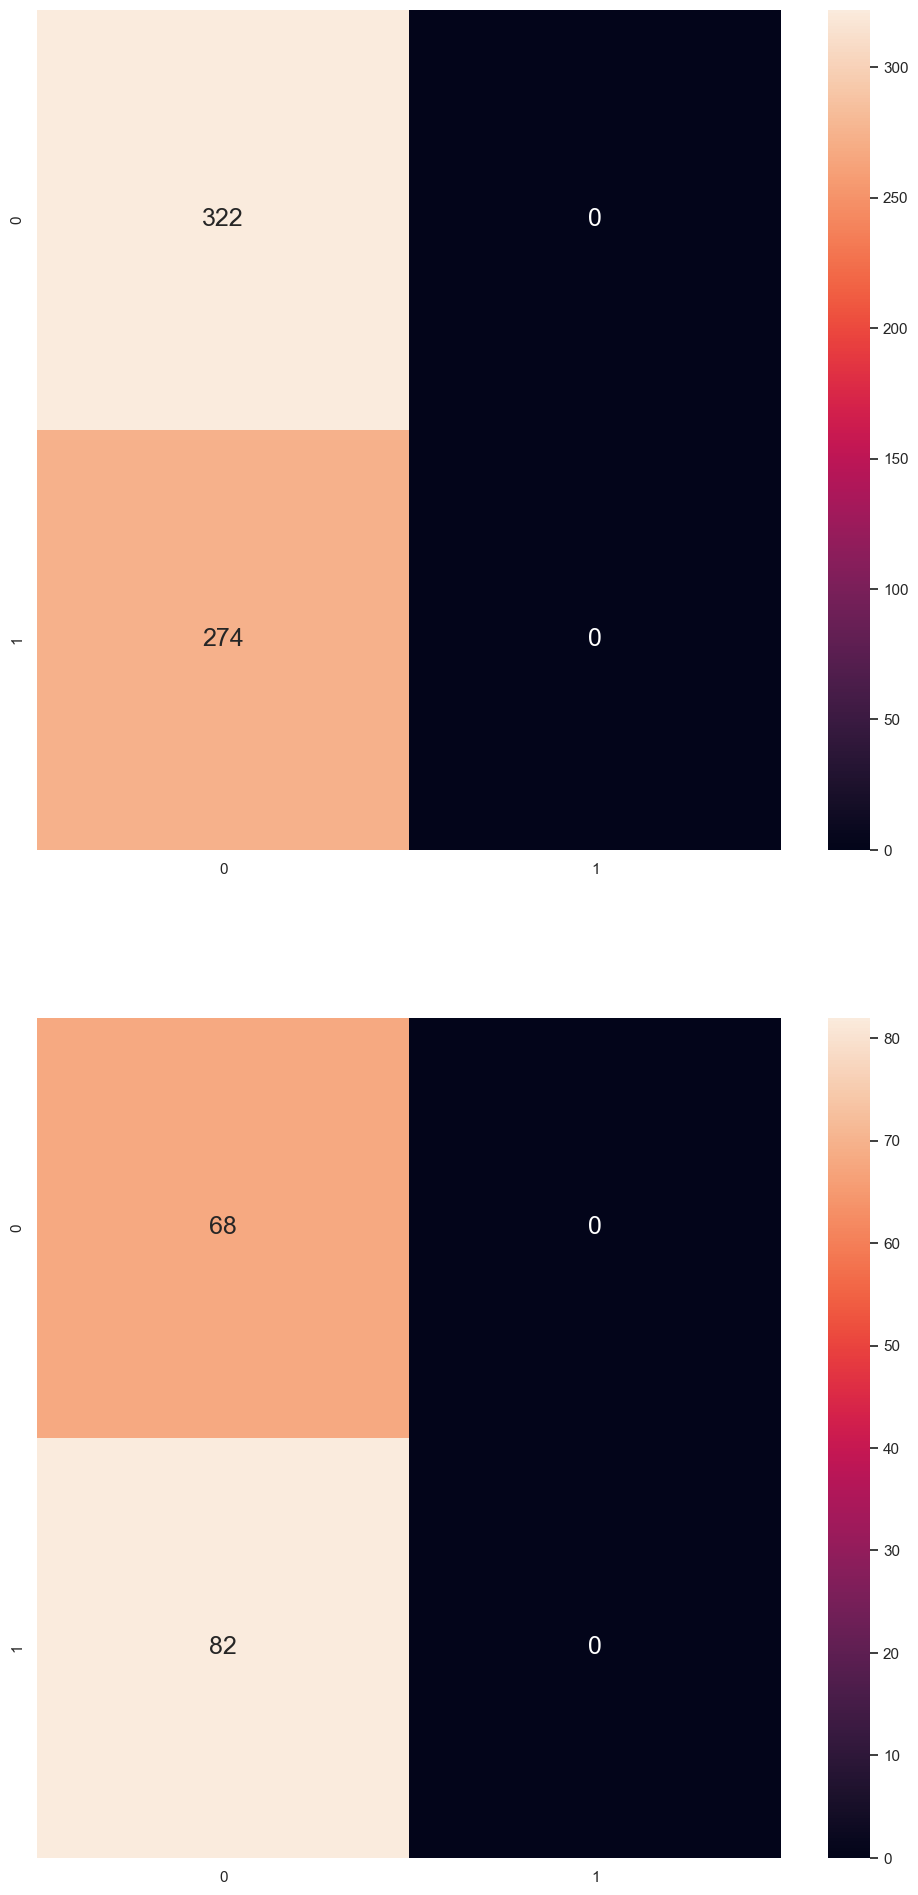

In [194]:
# Import essential models and functions from sklearn
from sklearn.dummy import DummyClassifier

# Dummy Classifier using Train Data
dumClas = DummyClassifier()
dumClas.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dumClas.predict(X_train)
y_test_pred = dumClas.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dumClas.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dumClas.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Multi-Class Random Forest Classifier

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.87751677852349

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.72



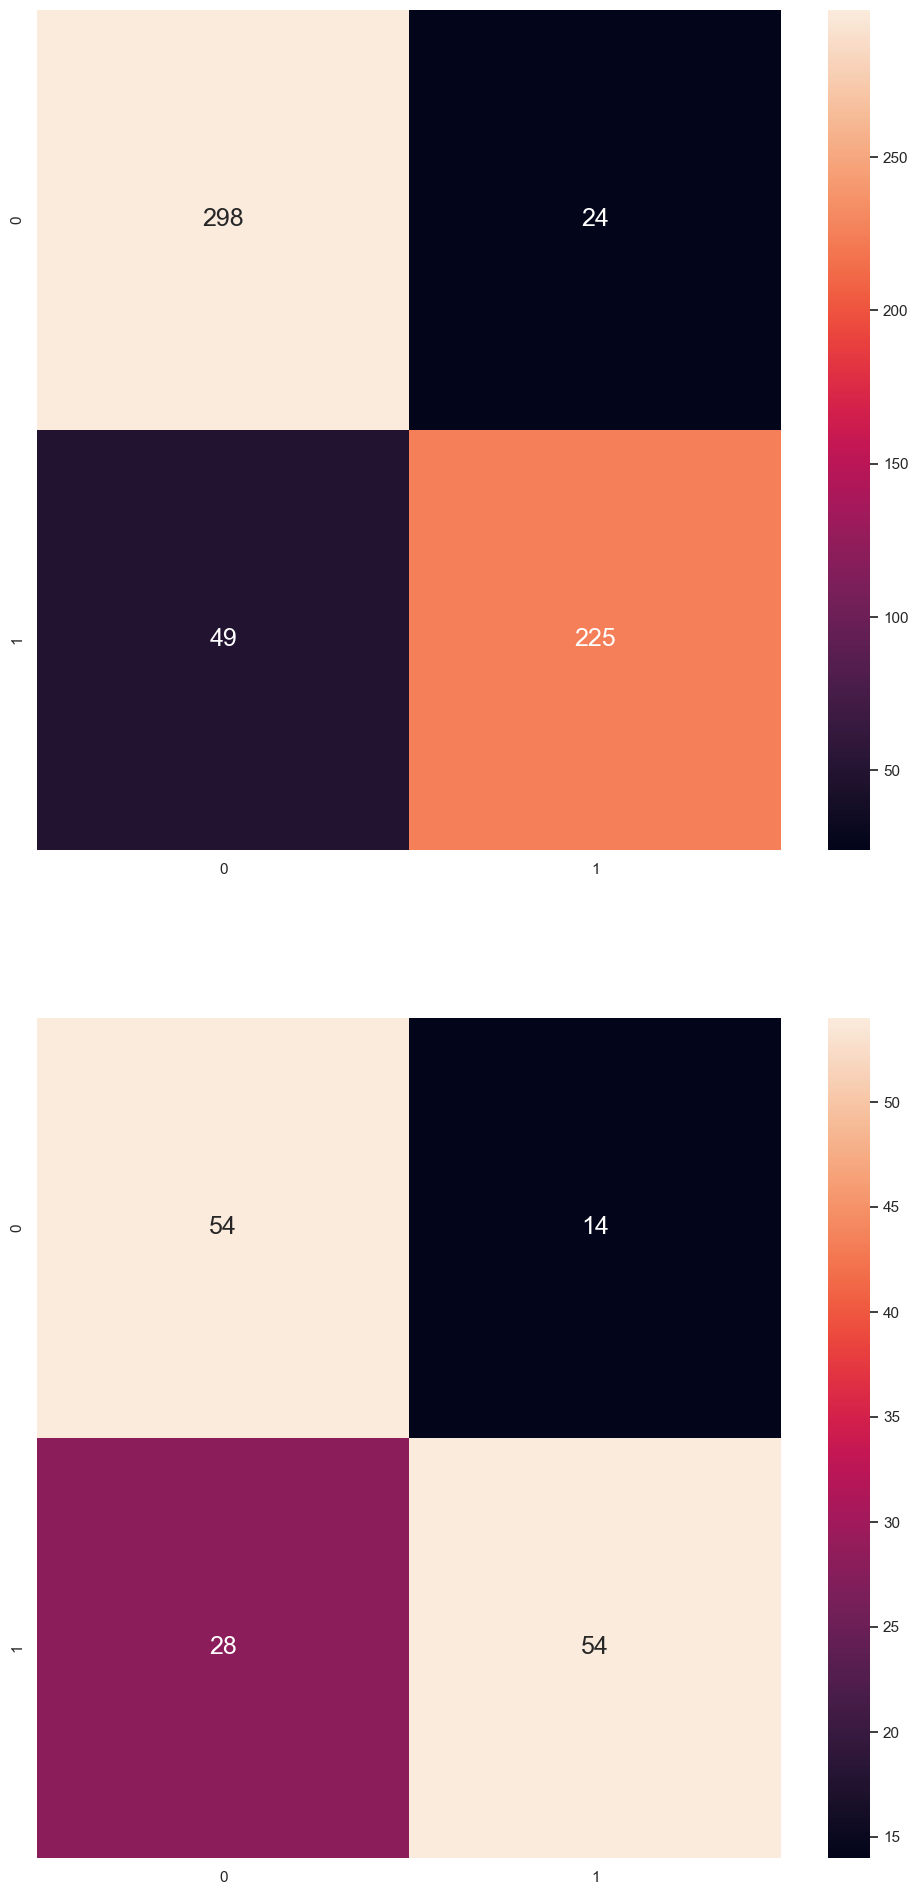

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Convert DataFrame to numpy array
y_train_array = np.ravel(y_train)
y_test_array = np.ravel(y_test)

# Random Forest using Train Data
ranFor = RandomForestClassifier(max_depth=7, n_estimators=100)
ranFor.fit(X_train, y_train_array)

# Predict Response corresponding to Predictors
y_train_pred = ranFor.predict(X_train)
y_test_pred = ranFor.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", ranFor.score(X_train, y_train_array))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", ranFor.score(X_test, y_test_array))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train_array, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test_array, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
plt.show()

# Balancing the dataset with upsampling technique

After the data cleaning, the number of data with heart disease is lower than the number of data without heart disease. This imbalance might reduce the accuracy of our prediction. Therefore, we will balance the data set by increasing the number of data with positive heart disease.

In [196]:
from sklearn.utils import resample


#set the minority class to a seperate dataframe
df_1 = ch_filtered[ch_filtered['HeartDisease'] == 1]
#set other classes to another dataframe
other_df = ch_filtered[ch_filtered['HeartDisease'] != 1]  
#upsample the minority class
df_1_upsampled = resample(df_1,random_state=42,n_samples=390,replace=True)
#concatenate the upsampled dataframe
df_upsampled = pd.concat([df_1_upsampled,other_df])
df_upsampled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
272,55,M,ASY,140,201,0,Normal,130,Y,3.0,Flat,1
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
734,56,M,ASY,130,283,1,LVH,103,Y,1.6,Down,1
416,63,M,ASY,140,260,0,ST,112,Y,3.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


<Axes: xlabel='HeartDisease', ylabel='count'>

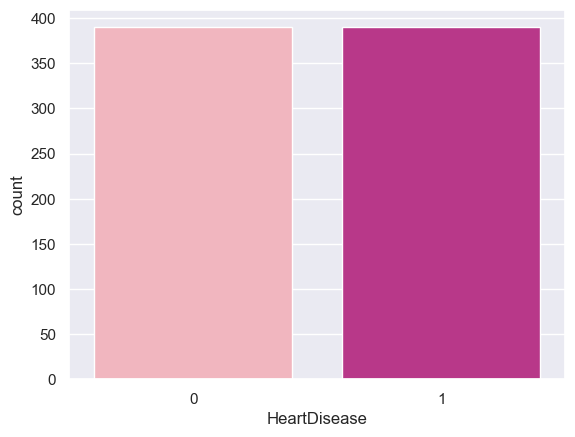

In [197]:
sb.countplot(data = df_upsampled, x=df_upsampled['HeartDisease'], palette='RdPu')

In [198]:
df_upsampled.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,53.284615,133.643590,243.547436,0.174359,139.566667,0.972051,0.500000
std,9.679512,17.219005,57.507305,0.379661,24.501540,1.103135,0.500321
min,28.000000,94.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,204.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,236.000000,0.000000,140.000000,0.650000,0.500000
75%,59.250000,140.000000,276.250000,0.000000,159.000000,1.800000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,6.200000,1.000000


In [199]:
ynew = df_upsampled['HeartDisease']
Xnew = df_upsampled[['Age', 'MaxHR', 'Oldpeak']]
# Split the data into training and testing sets
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(Xnew, ynew, test_size=0.25)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7982905982905983

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8153846153846154



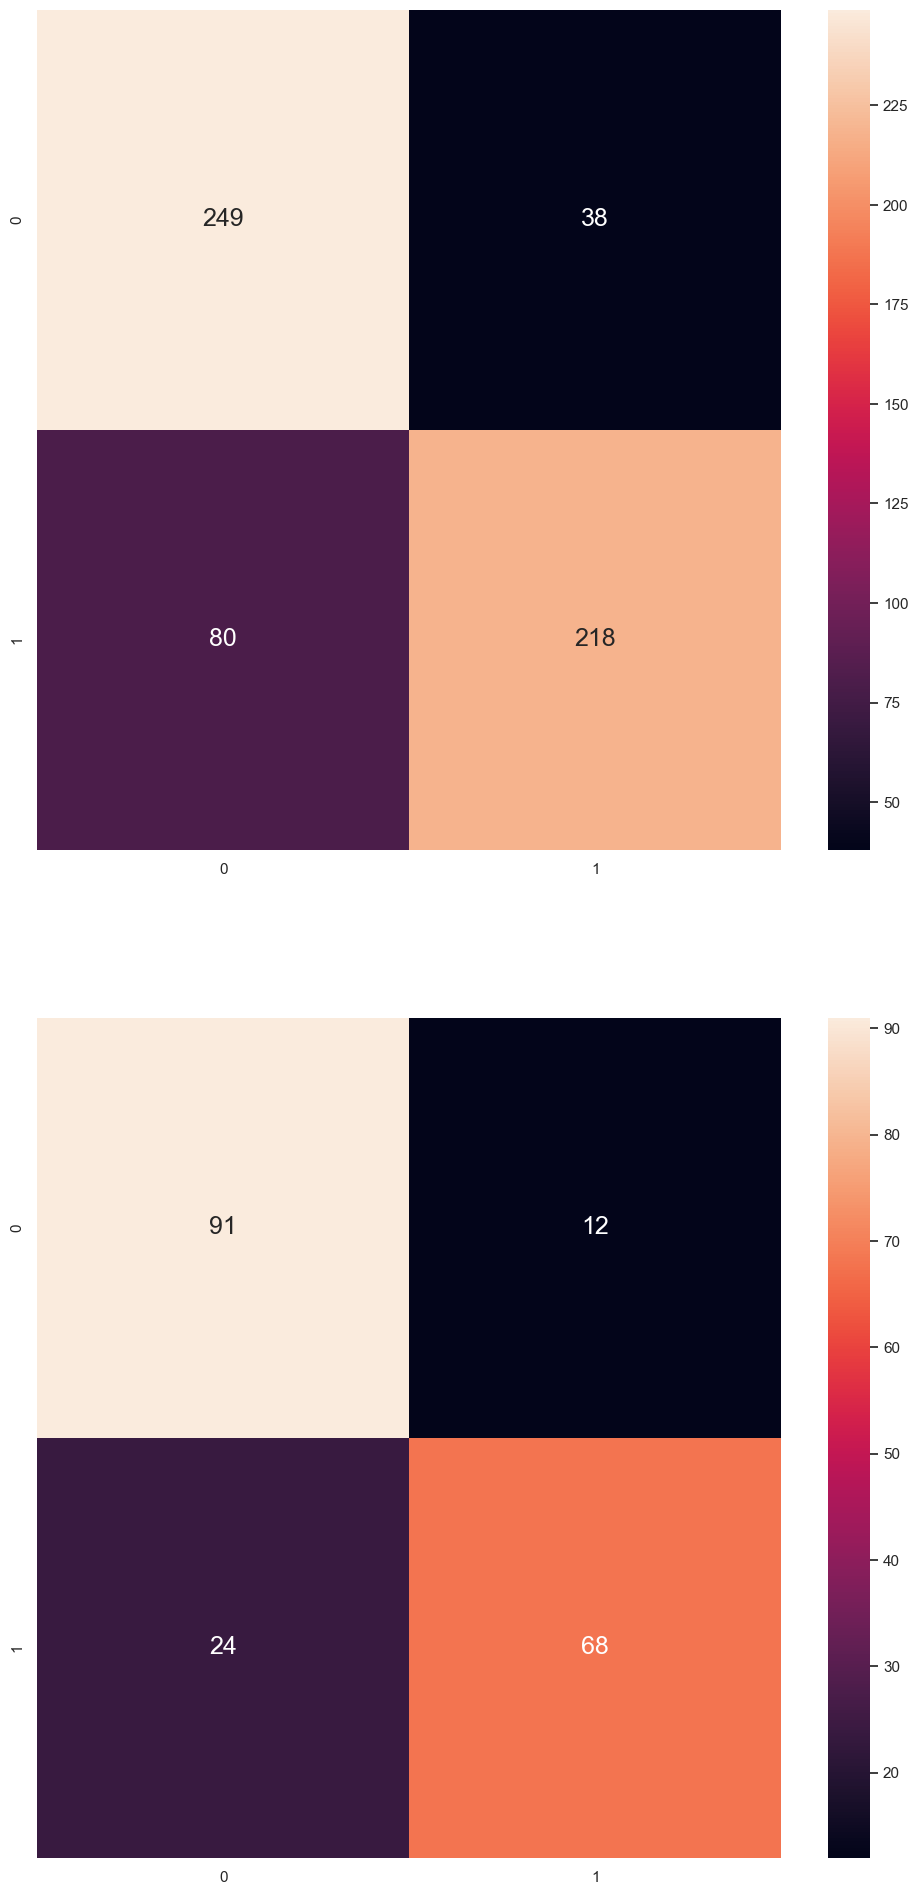

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_newtrain, X_newtest, y_newtrain, y_newtest = train_test_split(Xnew, ynew, test_size=0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=4)  # create the decision tree object
dectree.fit(X_train, y_train)  # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_newtrain)
y_test_pred = dectree.predict(X_newtest)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_newtrain, y_newtrain))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_newtest, y_newtest))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_newtrain, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_newtest, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
plt.show()  # Show the plot